# Predicting Female Labor Force Participation in Afghanistan

Team: Ishani Desai, Lily Li, Manuel Schonfeld and Maria Schwarz


Please see as well our website and screencast:

http://www.women-in-afghanistan.de

https://www.youtube.com/watch?v=l5WJ3zlkvAI

# Project Motivations

## Our Goal / motivation

Post Taliban, the U.S. Government and many other international aid organizations and donors have been funding large projects aimed to empower women and raise livelihoods in Afghanistan.  While billions of dollars have been spent, there is no significant evidence that economic conditions for women have substantially changed.  In fact, the female labor force participation rate has been more or less constant since the fall of the Taliban.  This leads us to believe that policy actions have not been optimal and there is room for improvement.

The aim of our project is to advise the Government of Afghanistan to help **improve female labor force participation in Afghanistan**.  For the purposes of this project, our goal is to develop a prediction model to help the Government of Afghanistan decide on the most optimal course of action or policy to attract women to join the labor force.  There has been very limited analysis on women in Afghanistan; thus, our model will help us determine the key characteristics that differentiate women who work from those who do not work.     

## Background / related work

The current female labor participation rate in Afghanistan is around 16%  – one of the lowest in the world.  Along with this, Afghanistan ranks at the bottom of the UN’s Gender Inequality Index, the Thomson Reuters poll stated that Afghanistan was the most dangerous country in the world for women, and in 2015, UN Women estimated that only 5% of businesses in Afghanistan are female owned.

Furthermore, given Afghanistan's level of per capita GDP, it is no where near the predicted female labor force participation that we would expect to see.  

<img src="Ushape_Afghanistan.jpg" width=500 height=300/>

The graph above reveals Claudia Goldin's theory presented in *The U-Shaped Female Labor Force Function in Economic Development and Economic History*, which states that there is a U-shape relationship between economic development and women's participation in the labor force. Basically, this reveals that female labor force rate of married women first declines and then rises as the country develops. The U-shaped nature is revealed both across the process of economic development and through the histories of currently advanced economics. Afghanistan is clearly an outlier.

These dismal statistics have serious implications for the country – for socioeconomic inclusivity, poverty reduction, and for overall growth and productivity.  Economic studies, such the studies mentioned in Esther Duflo’s *Women’s Empowerment and Economic Development*, suggest that improving female engagement in economic activity will benefit not only economic development, but will also promote sustainable long-term growth. While low female labor force is a problem in itself, it also implies that there are other underlying factors that prevent women from working such as limited mobility, cultural norms that persist, number of children, lack of economic opportunities, and/or low status or bargaining power in the household.  

In the Afghanistan context, while traditional gender norms play a large role in women’s decision to work, based on time-series data, it appears as though perceptions are gradually changing. This leads us to believe that the right policy intervention by the government could have an impact on female labor force participation.  

The Government of Afghanistan – more specifically, the current Ghani administration – has actively decided to improve the female labor force participation rate through the National Action Plan for Women’s Economic Empowerment. They have asked our team to help design the optimal policy to positively affect women’s decision to join the labor market. It is critical that the policy recommendations are not only feasible and supportable, but also technically correct. 

## Our Plan / initial questions

Despite the massive data collection efforts in Afghanistan, issues surrounding women’s work have not been carefully and comprehensively examined. There are countless variables that potentially influence a woman’s decision to work and it’s difficult to decide what and how to prioritize – it’s a *wicked* hard problem. In order to bring sustainable long-term improvement in women’s economic participation, we need to first understand what the key correlates are and what characteristics can help predict women’s economic participation in Afghanistan. We also want to ensure that donor money is spent effectively and efficiently; thus, the model must be evaluated to ensure that program costs are minimized and program outcomes are optimized.

Having thoroughly discussed causal models in our statistics courses, we found it difficult to prove the deep underlying causal connection between a single correlate and female labor force participation. Proving causation for a complex problem is a challenging task that takes time and the right data. Given that the Government is constrained by both time and data, we are trying to find a new and innovative approach to solve this challenging and sensitive public policy problem.  Inspired by the machine learning lectures, we decide to take a different approach to solving some of the world’s most challenging problems: *prediction models*.  

To support the Government’s efforts, we plan to develop a robust predictive model using techniques from CS-109 to help predict which women are and are not in the labor force. In addition, we plan to understand the key characteristics that are most linked with women who are in the labor force.  Based on these findings, we can begin designing feasible policy options that are technically sound. If we want to design a policy quickly that tries to address the most relevant factors, a prediction model will be a good first step. 

Given this, our main question is: **How can we get women in Afghanistan to join the labor force?**  Before we can begin to answer this, we need to better understand the complexities of this topic; thus, for this project, our question is: ***What are the key correlates to females in the labor force?*** and ***How can we best predict which woman is in the labor force?***

In this project file, we will take you through our thought process for finding the best model to predict female labor force participation. We begin by compiling, merging, cleaning, and exploring the data. Using supervised learning techniques, such as kNN, SVM, Random Forests, Decision Trees, etc. with a training and testing dataset, we will find the best classifer to make accurate and relevent predictions. In the end, we hope to find the most optimal model and indicators to accurately predict and tailor development programs to women in Afghanistan.

# Table of Contents

<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Data Cleaning and Setup

Given our questions and larger goals, it was important that we created a large and comprehenstive database with variables spanning a range of indicators that could potentially affect labor force participation. Variables such as years of education, number of children, age, marital status, rural/urban, ethnic group, husband’s education, father’s education, access to assets, and dwelling type to more localized variables such as local security, local perceptions, local norms, information sources, etc.  

Thanks to the Government of Afghanistan and Harvard Kennedy School Professor Michael Callen, we had access to a number of reliable data sources.  We relied heavily on 2 datasets:

(1) **2012 National Risk and Vulnerability Assessment (NRVA)**
- Source: *Central Statistics Organization of the Government of the Islamic Republic of Afghanistan* 
- Description: This survey is the only nation-wide survey available in Afghanistan.  It captures problems that the population face throughout the year, especially in terms of labor, poverty and food security.  In the 2011-2012 survey, it includes 20,828 households and roughly 163,000 individuals (all the members of the household). 

(2) **2015 Survey of the Afghan People**
- Source: *Asia Foundation*
- Description: The longest-running public opinion poll in the country. 9,271 Afghan citizens from all 34 provinces were interviewed on issues central to the country's development. The survey includes questions on women's rights.

For the first stage of cleaning, to maximize efficiency, we used Stata to build our initial dataset. In order to create our dataset, we had to first use the NRVA dataset to impute whether a person was in the labor force or not. We did this using the labor section of the household survey and created a binary variable 1 - in the Labor Force and 0 – not in the Labor Force. Essentially, using the main question and the skip patterns, we were able to create a rule that allowed us to categorize a person either in the labor force or not in the labor force.  We then only kept women between the ages of 17 – 49 to simulate an accurate Afghan labor force and to maximize the data we have. Certain modules of the survey were only asked to women between these ages, so it was important we restricted ourselves to this age group for now. We turned categorical variables into binary variables, handled missing observations on a case-by-case basis – in some instances, we took the average, in others, we changed it to 0 (if it was due to a skip pattern), dropped string variables with anecdotes, and merged relevant male variables (household head characteristics) to the dataset. We also did a sanity check on the buckets of variables to ensure it made some sense to keep - for example, we dropped the specific animal ownership variables.  

In addition to this, we used the Survey of the Afghan People to calculate province-level perceptions, norms, and sentiments over a variety of issues as well as how people get their news, how they feel about women working and going to school, etc. We disaggregate these individual-level perceptions by gender and then roll them up to the province level. In the end, we had merged the datasets at the province level and had over 500 variables to build our model with.          

We stored our de-identified datasets on Dropbox and collaborated through GitHub and Dropbox (as well as WhatsApp!).

In [2]:
# Load libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Load color palette
newcolors=['#3d1c02','#929591','#9e0168','#fffd01','#25ff29','#0504aa','#f8481c','#fe02a2']
#sns.palplot(sns.color_palette(newcolors))
colors = newcolors

## Database Creation

As stated earlier, we do the initial cleaning and merging of datasets in stata.  Then, we load the dta file into Python for another layer of cleaning and initial analysis.

In [3]:
dffull = pd.read_stata("merged_dataset3.dta")

In [4]:
import csv

# load CSV incl.  
with open('vardict.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('vardict_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        vardict = {rows[0]:rows[1] for rows in reader}
vardict
for key, value in vardict.iteritems():
    for column_title in dffull.columns.values:
        if key == column_title:
            dffull.rename(columns={column_title: value}, inplace=True)            
            
dffull.head()

,memid,age,hh_weight,ind_weight,woman_weight,Province_Code,province,radio_info_m,tv_info_m,mobile_info_m,internet_info_m,Afghan_direction_m,violence_victim_m,religioninpolitics_m,women_equalopps_m,women_workouthome_m,femaleHHcontribution_m,women_organization_m,mosque_info_m,shura_info_m,drinkwater_satisfaction_m,irrigationwater_satisfaction_m,electricity_satisfaction_m,clinics_satisfaction_m,medicine_satisfaction_m,education_satisfaction_m,roads_satisfaction_m,vote_m,women_madrasaedu_m,women_primary_m,women_hs_m,women_uniprovince_m,women_otherprovince_m,women_abroad_m,womenwork_gov_m,womenwork_ngo_m,womenwork_hospital_m,womenwork_army_m,women_marriageage_m,men_marriageage_m,lifesatisfaction_m,securityfear_m,injuryexplosive_m,womenwork_femaleschool_m,womenwork_coedschool_m,womenwork_femaleemployees_m,womenwork_coedemployees_m,women_leadCDC_m,women_provincegov_m,women_CEO_m,...,kitchen_open,kitchen_other,kitchen_miss,access_dwell_foothpath,access_dwell_unpaved,access_dwell_paved,access_dwell_miss,fuel_animal,fuel_bushes,fuel_firewood,fuel_crop,fuel_coal,fuel_oil,fuel_gas,fuel_electricity,fuel_other,heat_no,heat_ping,heat_firewood,heat_animal,heat_crop,heat_coal,heat_petrol,heat_gas,heat_electiricity,heat_other,toilet_openpit,toilet_latrine,toilet_impr_latrine,toilet_flush,toilet_none,toilet_dearan,toilet_other,toilet_miss,water_wellpub,water_wellpriv,water_pumpub,water_pumpriv,water_wells,water_springunpr,water_springprot,water_pipedpriv,water_pipedmuni,water_kariz,water_river,water_tanker,water_bottle,water_other,water_miss,birthcert_child
0,10221003,32,368,1840,371,17,Badakhshan,0.563691,0.454614,0.724256,0.014397,0.465658,0.014608,0.851758,0.866582,0.676001,0.074181,0.144099,0.956808,0.771355,0.518304,0.417523,0.244755,0.537091,0.471205,0.818936,0.310640,0.874331,1.000000,0.985392,0.970352,0.843216,0.354757,0.068426,0.698997,0.154494,0.985176,0.290794,17.671951,20.764051,0.909716,0.230357,2.000000,0.985392,0.782623,0.380769,0.143127,0.784849,0.464112,0.365765,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,18946002,20,103,309,104,31,Badghis,0.745555,0.474121,0.332215,0.000000,0.353127,0.061023,0.769925,0.598863,0.296852,0.720910,0.000000,0.854656,0.847176,0.543204,0.367783,0.061023,0.122047,0.203411,0.508528,0.157044,0.735566,0.898294,0.796589,0.768920,0.467845,0.284775,0.203411,0.434491,0.305117,0.650915,0.366140,18.760767,20.896955,0.694883,0.639545,3.851041,0.828300,0.454832,0.373742,0.325458,0.558181,0.469488,0.482501,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5095002,38,144,1152,148,9,Baghlan,0.964925,0.811587,0.573134,0.066827,0.444809,0.263796,0.559350,0.891654,0.671244,0.160683,0.190800,0.811889,0.417684,0.657699,0.655312,0.209710,0.505922,0.388868,0.823340,0.325314,0.868883,0.978955,0.933173,0.908713,0.792966,0.367270,0.194665,0.690387,0.257001,0.898724,0.269856,19.985218,24.216970,0.814985,0.562391,1.779910,0.940593,0.682204,0.288403,0.136351,0.718479,0.476816,0.447527,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,12854002,40,219,1314,225,21,Balkh,0.800380,0.661484,0.691077,0.122112,0.310882,0.045111,0.696169,0.873747,0.720689,0.155238,0.134165,0.835028,0.681534,0.328854,0.272210,0.400769,0.267398,0.189089,0.544173,0.269577,0.800959,0.989999,0.928900,0.959778,0.888240,0.531133,0.352704,0.838588,0.544457,0.908906,0.478788,19.343382,22.651751,0.665713,0.359074,1.925469,0.934433,0.778221,0.634462,0.419294,0.799869,0.735726,0.598213,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,6049002,41,71,568,73,10,Bamyan,0.519085,0.555010,0.538044,0.047649,0.380195,0.009521,0.536980,0.861940,0.826967,0.566566,0.048107,0.685583,0.795248,0.542888,0.334857,0.463997,0.543281,0.507239,0.718950,0.480999,0.885743,0.966675,0.938111,0.956949,0.933350,0.742754,0.540575,0.895222,0.709387,0.904786,0.456657,1

Make a copy and then delete variables that are not required, and variables that are sparse (i.e., more than a certain share missing):

In [5]:
df=dffull.copy()

# Only include women in working age
df = df[(df.working_age==1)].reset_index()

# Delete columns
deletionlist = ["hh_weight", "hh_size2", "ind_weight", "memid", "woman_weight"]
for column in deletionlist:
    del df[column]
    
# Understand sparse (i.e., have at least x% of missing variables)
missingvalues = 0.9
sparsevars=[]
nonsparsevars=[]
for column in df.columns:
    if  (float(df[column].isnull().sum())/len(df))>missingvalues:
        sparsevars.append(column)
    else: 
        nonsparsevars.append(column)

dfnew=df[nonsparsevars]
print "We have deleted ", len(sparsevars), "variables with more than %.0f percent missing" % (missingvalues*100)
dfnew.shape



We have deleted  0 variables with more than 90 percent missing


(24336, 382)

We have 24,336 observations (females) and 389 different indicators (variables).
For better readability, we use more descriptive column titles that we prepared in a csv file. The variables that have _m refers to male perceptions and _f refers to female perceptions.

## Binary Variables

First, we begin by defining a function that for each column determines whether it has been coded as a binary variable or not.

In [6]:
'''Function: Identify dummy variables.'''

def isdummy(array):
    if (array.count(1)+array.count(0)+sum(np.isnan(array)))==len(array):
        dummy=True
    elif (array.count(1)+sum(np.isnan(array)))==len(array):
          dummy=True
    else:
        dummy=False
    return dummy

Now, we go through all the columns of the dataframe that are not of type object and identify whether there are a binary variable: 

In [7]:
import time
start = time.time()

dfreduced = df.loc[:, (df.dtypes != object)]
binaryarrays = []
for column in dfreduced.columns:
    if isdummy(list(np.array(dfreduced[column])))==True:
        binaryarrays.append(column)
    else: None #print "type:", dfreduced[column].dtype 

print "Time elapsed: %f " %  (time.time()-start)
print "We have", len(binaryarrays), "binary (numerical) variables in the dataset."
BINARY = binaryarrays

Time elapsed: 50.129416 
We have 230 binary (numerical) variables in the dataset.


Let us have a look at our binary variables: Some of them have a standard deviation of 0, i.e., they will not be helpful in predicting anything. We drop these variables:

In [8]:
BINARYNEW=[]
for column in BINARY:
    try:
        if df[column].max()-df[column].min()==0:
            print column, 
        else: BINARYNEW.append(column)
    except: pass
len(BINARYNEW)

working_age head_male

228

## Numerical variables

Similarly to what we have done before, we now create a list of all numerical variables in our dataset and delete those which do not have any predictive power (std = 0):

In [9]:
dfreduced = df.loc[:, (df.dtypes != object)]
NUMERICAL = []
for column in dfreduced.columns:
    if column in list(BINARY):
        None
    else:
        NUMERICAL.append(column)

# Delete variables with no predictive power
NUMERICALNEW=[]
for column in NUMERICAL:
    #print column
    if df[column].max()-df[column].min()==0:
        print column, 
    else: NUMERICALNEW.append(column)

## Test and Training Sets


After standardizing our variable set, we create a mask that will help us split our dataset into a training and test set. For various classifiers, the training set will be further split into train and validation sets - either within our classifier function cv_optimize or within a customized grid search (if feature training needs to occur within the cross-validation loop). 

We further create a list VARTOUSE, which contains all explanatory variables. We remove the "housewife" indicator from this list, since it has a very high correlation with labor force and is usually considered as mutually exclusive with labor force participation.

In [10]:
from sklearn.cross_validation import train_test_split

VARTOUSE = BINARYNEW + NUMERICALNEW
VARTOUSE.remove(u"labor_force")
BINARYNEW.remove(u"labor_force")
BINARYNEW.remove(u"housewife")
VARTOUSE.remove(u"housewife")
dftouse=df.reset_index()

In [11]:
# Unbalanced
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)
print mask.shape, mask.sum()

(24336,) 17035


## Standardize the Continuous Variables

In this section, we standardize the continuous variables (based on the training set) and apply this standardization to the test set. We standardize variables to ensure comparability across coefficients (i.e. ensure that all continuous variables are on the same scale).

In [12]:
from sklearn.preprocessing import StandardScaler

# Create touse
if sum(dftouse[NUMERICALNEW].isnull().sum())==0:
    scaler = StandardScaler().fit(dftouse[(mask==1)][NUMERICALNEW])
    dftouse.loc[:, NUMERICALNEW]= scaler.transform(dftouse[:][NUMERICALNEW])
# In case there are missing values
else:
    for column in NUMERICALNEW:
        scaler = StandardScaler().fit(dftouse[(mask==1) & (dftouse[column].isnull()==False)][column])
        dftouse.loc[(dftouse[column].isnull()==False), column]= scaler.transform(dftouse[dftouse[column].isnull()==False][column])

Next, we are using the standardized data to create training and test sets (using the mask we have previously calculated).

In [13]:
# Create sub dataframes
subdf=dftouse[VARTOUSE]
X = subdf.values
y = dftouse.labor_force

print X.shape, y.shape, mask.shape

if mask !=None:
    Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

(24336, 376) (24336,) (24336,)


/Users/mariaschwarz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


We briefly check whether the our dataframes have the same shape, as well as whether our response variable (women in labor force) is equally represented in the training and test sets.

In [14]:
dftouse[mask==1].shape, y[mask==1].shape

((17035, 383), (17035,))

In [15]:
# make sure we didn't get unlucky in our mask selection
print "% Women in labor force in Training:", np.mean(df.labor_force[mask])
print "% Women in labor force in Testing:", np.mean(df.labor_force[~mask])

% Women in labor force in Training: 0.277135312557
% Women in labor force in Testing: 0.285166412592


# Exploratory Data Analysis

In this section, we are exploring our response variable (i.e., female labor market participation) in more detail. We will try to understand the variable by looking at descriptive statistics, pearson correlation coefficients, kernel density estimates (for continuous variables) as well as histograms (for binary variables).

## Understanding Our Dependent Variable

In [16]:
dfnew.head()
dfnew.describe()

,index,age,Province_Code,radio_info_m,tv_info_m,mobile_info_m,internet_info_m,Afghan_direction_m,violence_victim_m,religioninpolitics_m,women_equalopps_m,women_workouthome_m,femaleHHcontribution_m,women_organization_m,mosque_info_m,shura_info_m,drinkwater_satisfaction_m,irrigationwater_satisfaction_m,electricity_satisfaction_m,clinics_satisfaction_m,medicine_satisfaction_m,education_satisfaction_m,roads_satisfaction_m,vote_m,women_madrasaedu_m,women_primary_m,women_hs_m,women_uniprovince_m,women_otherprovince_m,women_abroad_m,womenwork_gov_m,womenwork_ngo_m,womenwork_hospital_m,womenwork_army_m,women_marriageage_m,men_marriageage_m,lifesatisfaction_m,securityfear_m,injuryexplosive_m,womenwork_femaleschool_m,womenwork_coedschool_m,womenwork_femaleemployees_m,womenwork_coedemployees_m,women_leadCDC_m,women_provincegov_m,women_CEO_m,women_minister_m,women_president_m,radio_info_f,tv_info_f,...,kitchen_open,kitchen_other,kitchen_miss,access_dwell_foothpath,access_dwell_unpaved,access_dwell_paved,access_dwell_miss,fuel_animal,fuel_bushes,fuel_firewood,fuel_crop,fuel_coal,fuel_oil,fuel_gas,fuel_electricity,fuel_other,heat_no,heat_ping,heat_firewood,heat_animal,heat_crop,heat_coal,heat_petrol,heat_gas,heat_electiricity,heat_other,toilet_openpit,toilet_latrine,toilet_impr_latrine,toilet_flush,toilet_none,toilet_dearan,toilet_other,toilet_miss,water_wellpub,water_wellpriv,water_pumpub,water_pumpriv,water_wells,water_springunpr,water_springprot,water_pipedpriv,water_pipedmuni,water_kariz,water_river,water_tanker,water_bottle,water_other,water_miss,birthcert_child
count,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,...,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.00000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.00000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000
mean,12167.500000,31.061801,17.519765,0.847009,0.496017,0.551077,0.087376,0.412841,0.208528,0.672389,0.701824,0.472874,0.252236,0.232587,0.774063,0.589673,0.733669,0.502125,0.313749,0.464927,0.392660,0.670174,0.414695,0.729752,0.928320,0.845874,0.767284,0.619657,0.364596,0.248891,0.571796,0.320555,0.776373,0.344660,18.485744,21.397301,0.754023,0.659602,2.346929,0.801413,0.544925,0.382888,0.265728,0.606250,0.440503,0.439150,0.457670,0.416956,0.773827,0.511013,...,0.197198,0.008013,0.003000,0.369412,0.569691,0.060487,0.000411,0.253452,0.319239,0.312747,0.008629,0.003657,0.000370,0.095948,0.002178,0.00378,0.013437,0.222674,0.447444,0.203033,0.012204,0.071376,0.000493,0.013601,0.005835,0.009903,0.24548,0.550296,0.023997,0.025189,0.145669,0.008095,0.001027,0.000247,0.059500,0.206032,0.152531,0.090031,0.025394,0.126520,0.050008,0.029298,0.030449,0.027942,0.161202,0.015779,0.000288,0.024449,0.000575,0.203279
std,7025.342412,8.254985,9.646291,0.158918,0.235360,0.196728,0.076494,0.110506,0.136468,0.167519,0.165367,0.188980,0.165506,0.194809,0.107998,0.177322,0.155619,0.145958,0.203897,0.126641,0.138988,0

**Labor force participation by age group**

First, we look at the number of women in the labor force by age group. We see that - across all age levels - the share of women in the labor force is fairly low (i.e., around one forth). 

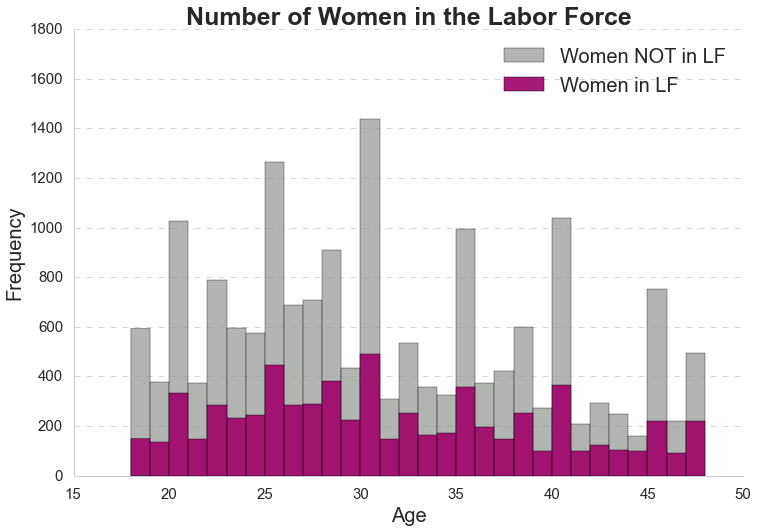

In [17]:
fig,ax = plt.subplots(figsize=(12, 8))

ax.set_ylim(0,1800)
ax.xaxis.grid(False)
ax.yaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Frequency',fontsize=20)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.tick_params(axis='both',labelsize=15)
plt.hist(np.array(dfnew[dfnew["labor_force"]==0].age), bins=np.arange(18,49,1), color=colors[1], alpha=0.7, label="Women NOT in LF");
plt.hist(np.array(dfnew[dfnew["labor_force"]==1].age), bins=np.arange(18,49,1), color=colors[2], alpha=0.9, label="Women in LF");
plt.title("Number of Women in the Labor Force", fontsize=25,fontweight='bold')
plt.legend(fontsize=20);

**Labor force participation by age group (probability distribution)**

Next, we look at the frequency distribution of these graphs. We examine the probability distribution of age by labor force status.  We find that there is no significant difference in age between women who are in and not in the labor force.  The mean for both groups is highlighted by the dotted line.

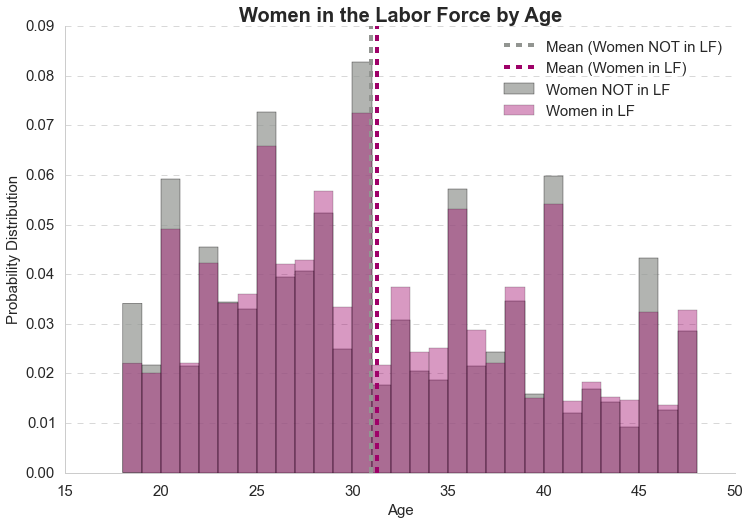

In [18]:
fig,ax = plt.subplots(figsize=(12, 8))

ax.set_ylim(0,.09)
ax.xaxis.grid(False)
ax.yaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Probability Distribution',fontsize=15)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.tick_params(axis='both',labelsize=15)
plt.hist(np.array(dfnew[dfnew["labor_force"]==0].age), normed=1, bins=np.arange(18,49,1), color=colors[1], alpha=0.7, label="Women NOT in LF");
plt.hist(np.array(dfnew[dfnew["labor_force"]==1].age), normed=1, bins=np.arange(18,49,1), color=colors[2], alpha=0.4, label="Women in LF");
plt.title("Women in the Labor Force by Age", fontsize=20, fontweight='bold')
plt.axvline(dfnew[dfnew["labor_force"]==0].age.mean(), color=colors[1], linestyle='dashed', linewidth=4, label="Mean (Women NOT in LF)")
plt.axvline(dfnew[dfnew["labor_force"]==1].age.mean(), color=colors[2], linestyle='dashed', linewidth=4, label ="Mean (Women in LF)")
plt.legend(fontsize=15);

**Labor force participation by number of children**

We examine the probability distribution of number of children by labor force status.  We find that there is no significant difference in number of children between women who are in and not in the labor force.  Women in the labor force have a higher number of children on average – we find this surprising as theory generally states that fewer children leads to an increased likelihood of female labor force participation.

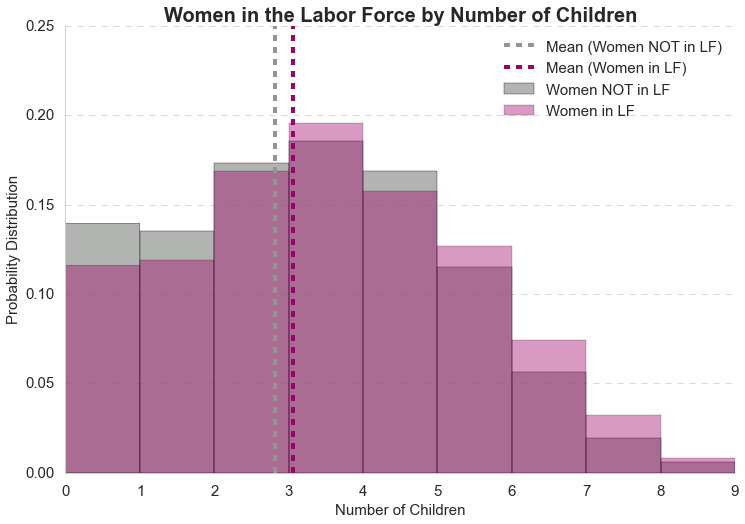

In [19]:
fig,ax = plt.subplots(figsize=(12, 8))

ax.set_ylim(0,.25)
ax.xaxis.grid(False)
ax.yaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1)
ax.set_xlabel('Number of Children', fontsize=15)
ax.set_ylabel('Probability Distribution',fontsize=15)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.tick_params(axis='both',labelsize=15)
plt.hist(np.array(dfnew[dfnew["labor_force"]==0].n_child), normed=1, bins=np.arange(0,10,1), color=colors[1], alpha=0.7, label="Women NOT in LF");
plt.hist(np.array(dfnew[dfnew["labor_force"]==1].n_child), normed=1, bins=np.arange(0,10,1), color=colors[2], alpha=0.4, label="Women in LF");
plt.title("Women in the Labor Force by Number of Children", fontsize=20,fontweight='bold')
plt.axvline(dfnew[dfnew["labor_force"]==0].n_child.mean(), color=colors[1], linestyle='dashed', linewidth=4, label="Mean (Women NOT in LF)")
plt.axvline(dfnew[dfnew["labor_force"]==1].n_child.mean(), color=colors[2], linestyle='dashed', linewidth=4, label ="Mean (Women in LF)")
plt.legend(fontsize=15);

**Labor force participation by marriage status**

We examine the probability distribution of age of first marriage by labor force status.  We find that there is no significant difference in age of first marriage between women who are in and not in the labor force – in fact, the age is the same in either case and the distribution is very similar as well.  This is surprising since we might expect that women who married later might be more likely to be in the labor force.

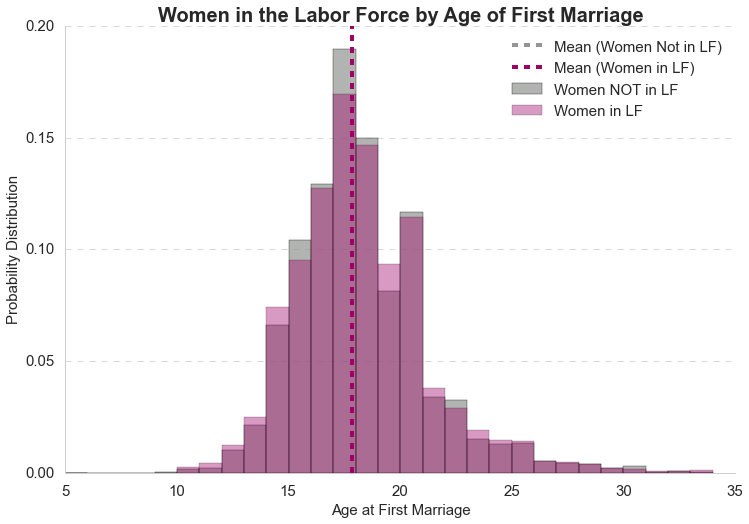

In [20]:
fig,ax = plt.subplots(figsize=(12, 8))

ax.set_ylim(0,.2)
ax.xaxis.grid(False)
ax.yaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1)
ax.set_xlabel('Age at First Marriage', fontsize=15)
ax.set_ylabel('Probability Distribution',fontsize=15)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.tick_params(axis='both',labelsize=15)
plt.hist(np.array(dfnew[dfnew["labor_force"]==0].age_marriage1), normed=1, bins=np.arange(5,35,1), color=colors[1], alpha=0.7, label="Women NOT in LF");
plt.hist(np.array(dfnew[dfnew["labor_force"]==1].age_marriage1), normed=1, bins=np.arange(5,35,1), color=colors[2], alpha=0.4, label="Women in LF");
plt.title("Women in the Labor Force by Age of First Marriage", fontsize=20,fontweight='bold')
plt.axvline(dfnew[dfnew["labor_force"]==0].age_marriage1.mean(), color=colors[1], linestyle='dashed', linewidth=4, label="Mean (Women Not in LF)")
plt.axvline(dfnew[dfnew["labor_force"]==1].age_marriage1.mean(), color=colors[2], linestyle='dashed', linewidth=4, label = "Mean (Women in LF)")
plt.legend(fontsize=15);

## Pearson Correlations

In this section, we would like to look at histograms and kernel density estimates (KDE) for our most correlated (top 28) binary and continuous variables. We first determine the Pearson correlation coefficient, rank them by their absolute value and plot the corresponding histograms / KDEs.

Across continuous and binary variables, we see the following trends:

1. Household being negatively affected by **violence** in the past year – women in households who have been affected by violence are less likely to be associated with a higher female labor force participation
2. Household **selling any animal products** in the past year – women in households who have sold animal products are associated with a higher female labor force participation
3. Average female province-level **perception of contributing to the household income** – women in households in regions with a higher share of females who feel they contribute to household income are associated with higher female labor force participation
4. Average male province-level perception of **fearing for own or family’s personal safety or security** – women in households in regions with a higher share of males who fear for their safety are associated with lower female labor force participation
5. Average female province-level norm of **obtaining information from a community shura** – women in households in regions with a higher share of females who obtain information from a community shura are associated with higher female labor force participation
6. Average female province-level perception that it should be **acceptable for women to be a CEO** of a large company – women in households in regions with a higher share of females who feel it is acceptable for women to be a CEO are associated with higher female labor force participation

**These descriptive statistics paint quite a telling picture: security and female perceptions appear to matter quite a bit.  Through our predictive models and analysis, we will see if this holds true.**

Please note as well, that the most correlated variables that have been picked show highest correlations - independent of their statistical significance (we will look into this later). For this reason, some seemingly unimportant variables (e.g., having delivered in a "non-specified" birth facility) show up in this list as a dominant feature, while the pattern might have been triggered by a fairly small number of observations.

In [21]:
from scipy.stats.stats import pearsonr
correlations=dict()
#BINARYNEW.remove("labor_force")
for var in BINARYNEW:
    correlations[var] = abs(pearsonr(dftouse[(mask==1) & (dftouse[var].isnull()==False)][var], y[(mask==1) & (dftouse[var].isnull()==False)])[0])
myList = sorted(correlations, key=correlations.get, reverse=True)

### Histogram of Binary Variables (most correlated with labor force participation)

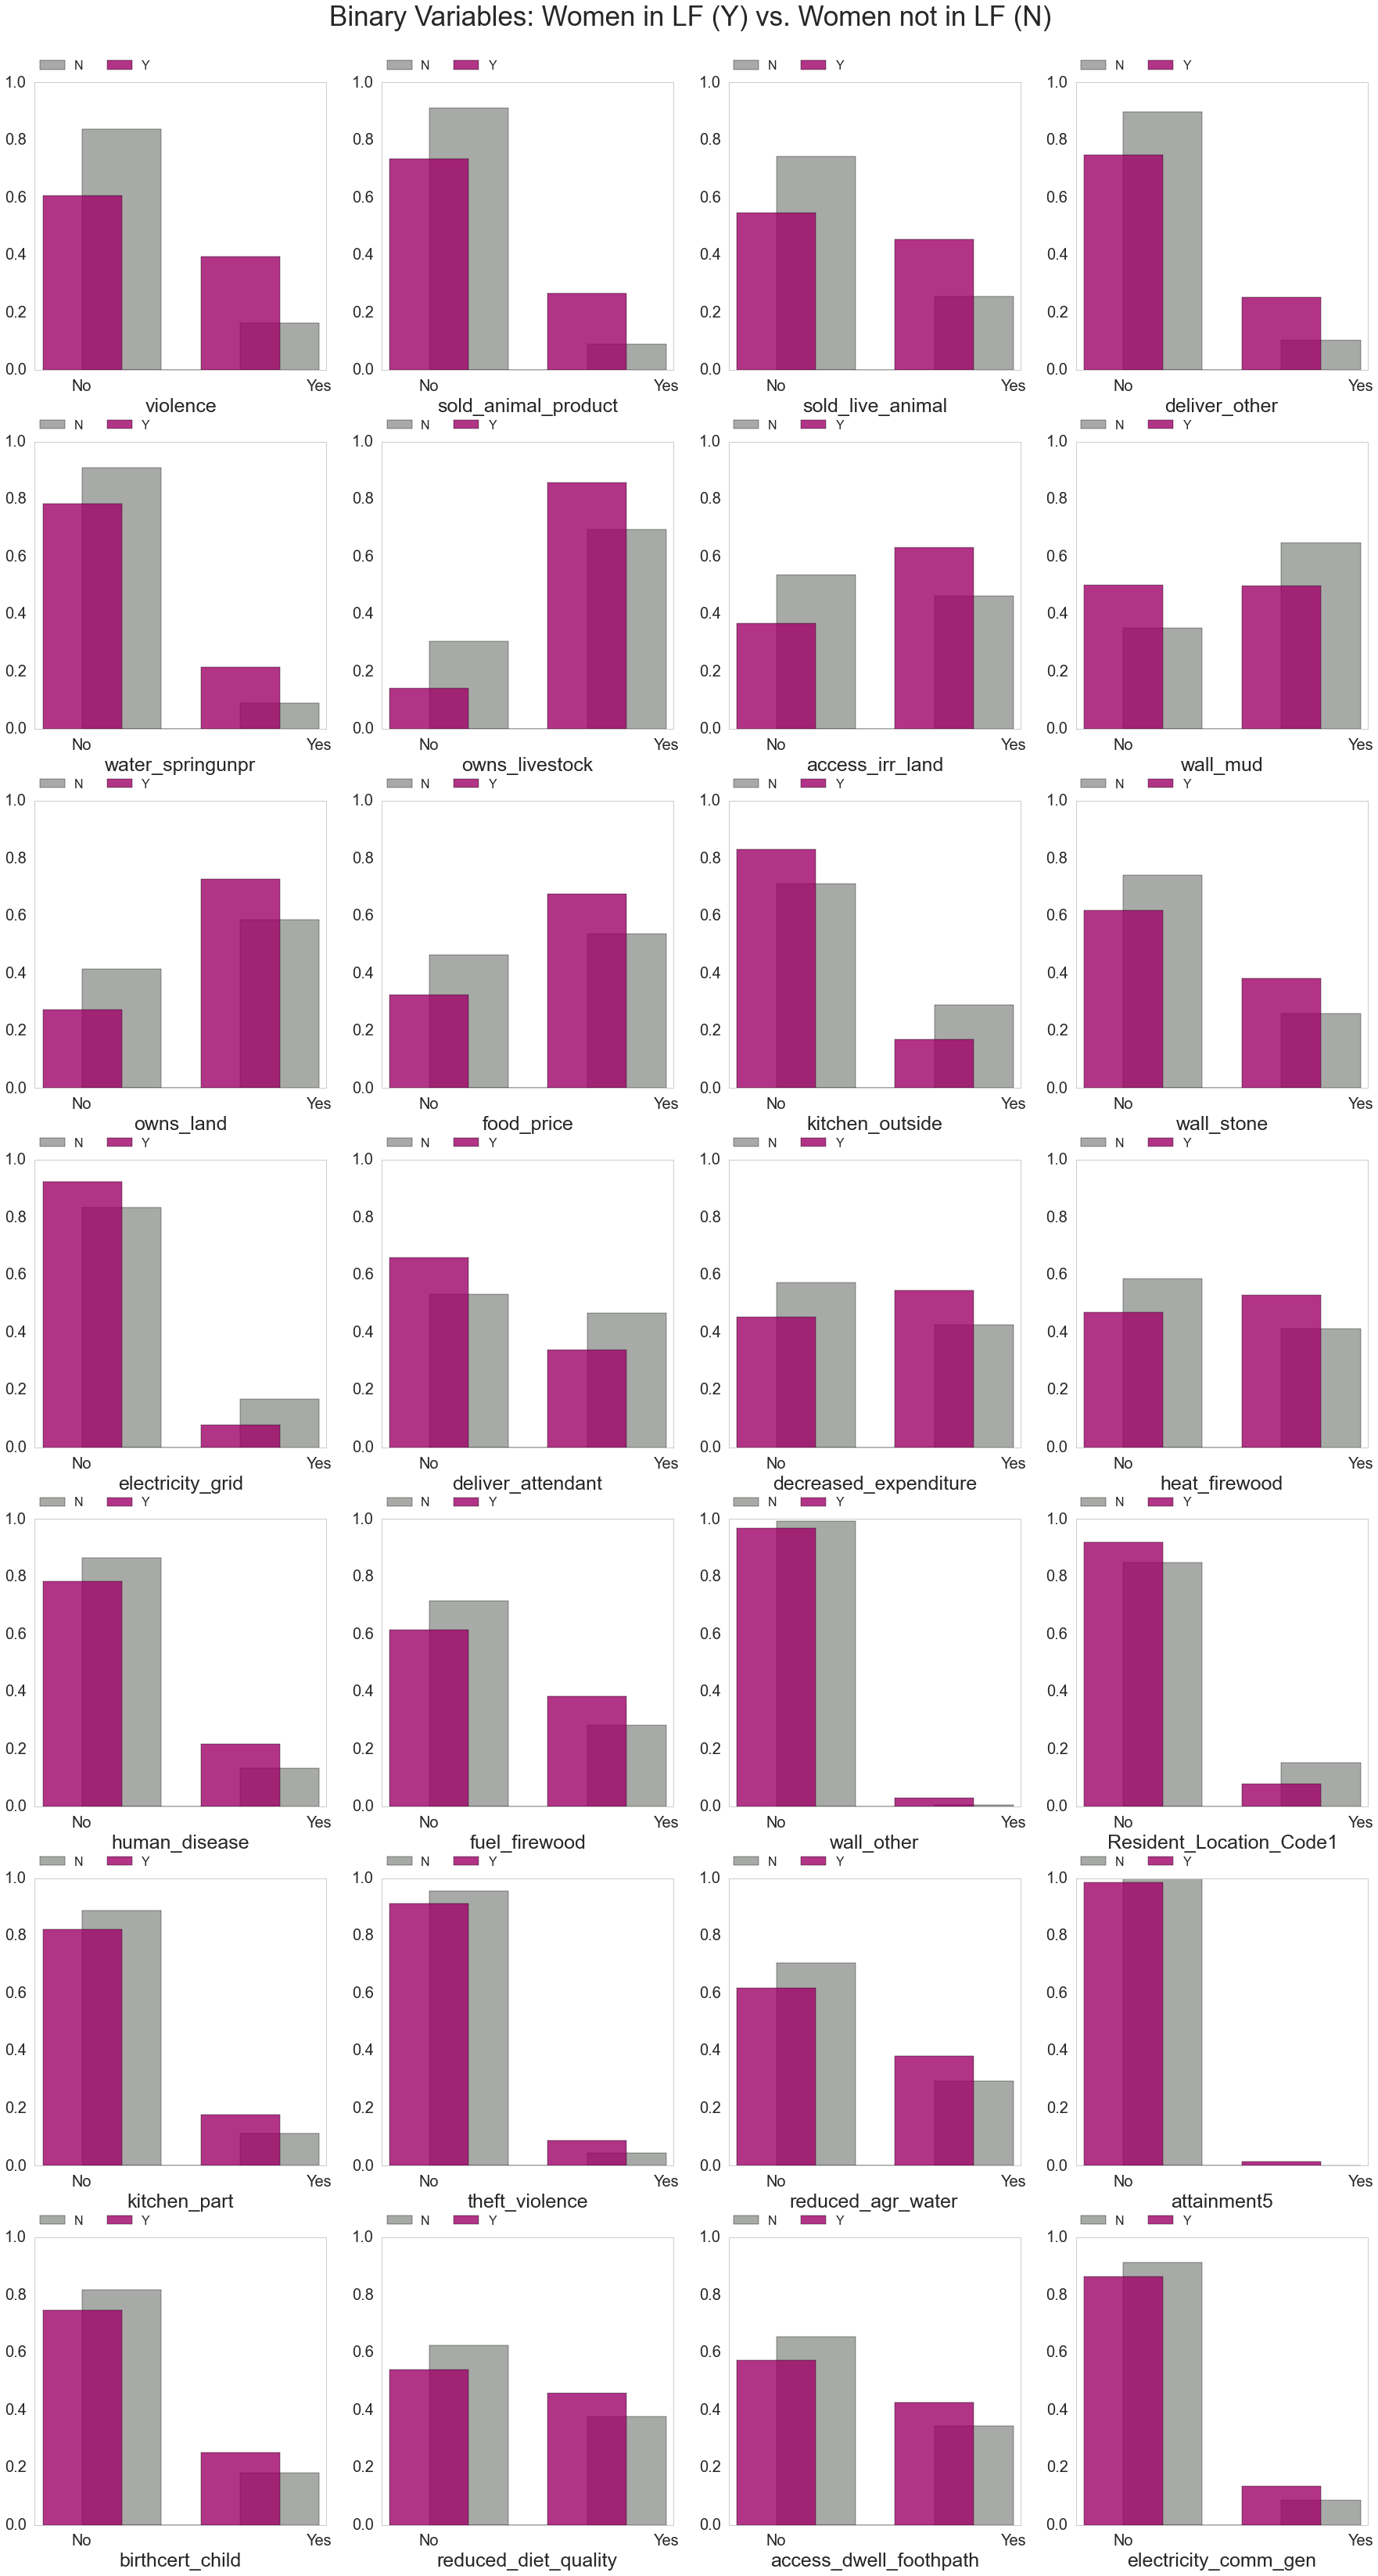

In [22]:
labels = ['No','Yes']
displaygraphs=28
#dftouse["labor_force"]=y

fig = plt.figure(figsize=(25, 45))
for index in range(displaygraphs):
    # Add new subplot
    axes = fig.add_subplot(displaygraphs/4,4,index+1)
    data = np.array(dftouse[(mask==1) & (dftouse.labor_force==0) & (dftouse[myList[index]].isnull()==False)][(myList[index])])
    data2 = np.array(dftouse[(mask==1) & (dftouse.labor_force==1) & (dftouse[myList[index]].isnull()==False)][(myList[index])])
    
    results,edges = np.histogram(data,3, normed=1)
    binWidth = edges[1] - edges[0]
    plt.bar(edges[:-1],results*binWidth,binWidth,facecolor=colors[1], alpha=0.8,label='N')

    results2,edges2 = np.histogram(data2,3,normed=1)
    binWidth2 = edges2[1] - edges2[0]
    plt.bar(edges[:-1], results2*binWidth2, binWidth2,facecolor=colors[2], alpha=0.8,align='center',label='Y')

    axes.xaxis.grid(False)
    axes.yaxis.grid(False)
    axes.set_xlim([-0.2,1.03])
    axes.set_ylim([0,1])
    axes.set_xticks([0,1])
    axes.set_xlabel(myList[index],fontsize=25)
    axes.set_xticklabels(labels)
    plt.tick_params(axis='both',labelsize=20)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, borderaxespad=0.)
fig.suptitle('Binary Variables: Women in LF (Y) vs. Women not in LF (N)',fontsize=35,y=1.02)
#fig.subplots_adjust(top=0.9)
fig.tight_layout(pad=2.5);

In [23]:
def binary_fig(index,loc,title):

    fig,ax = plt.subplots(figsize=(6, 7.5))
    yTickPos = np.arange(2)

    data = np.array(dftouse[(mask==1) & (dftouse.labor_force==0) & (dftouse[myList[index]].isnull()==False)][(myList[index])])
    data2 = np.array(dftouse[(mask==1) & (dftouse.labor_force==1) & (dftouse[myList[index]].isnull()==False)][(myList[index])])

    results,edges = np.histogram(data,3, normed=1)
    binWidth = edges[1] - edges[0]
    plt.bar(edges[:-1],results*binWidth,binWidth,facecolor=colors[1], alpha=0.8,label='Not in Labor Force')

    results2,edges2 = np.histogram(data2,3,normed=1)
    binWidth2 = edges2[1] - edges2[0]
    plt.bar(edges[:-1], results2*binWidth2, binWidth2,facecolor=colors[2], alpha=0.8,align='center',label='In Labor Force')

    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    ax.set_ylim(0,1,0.2)
    ax.set_xlim([-0.2,1.03])
    ax.set_xticks(ticks = yTickPos)
    ax.set_xticklabels(labels)
    #ax.set_xlabel(fontsize=20)
    ax.set_ylabel('Share of Women (Not) in Labor Force',fontsize=20)

    plt.tick_params(axis='both',labelsize=18)
    plt.legend(loc=loc,fontsize=18)
    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, borderaxespad=0.)

    fig.suptitle(title,fontsize=20,y=1)
    fig.subplots_adjust(top=0.9);

In [24]:
def binary_fig2(index1,index2,title1,title2,loc):

    fig,(ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=False, figsize=(11, 7.5))
    yTickPos = np.arange(2)

    data = np.array(dftouse[(mask==1) & (dftouse.labor_force==0) & (dftouse[myList[index1]].isnull()==False)][(myList[index1])])
    data2 = np.array(dftouse[(mask==1) & (dftouse.labor_force==1) & (dftouse[myList[index1]].isnull()==False)][(myList[index1])])

    results,edges = np.histogram(data,3, normed=1)
    binWidth = edges[1] - edges[0]
    ax1.bar(edges[:-1],results*binWidth,binWidth,facecolor=colors[1], alpha=0.8,label='Not in Labor Force')

    results2,edges2 = np.histogram(data2,3,normed=1)
    binWidth2 = edges2[1] - edges2[0]
    ax1.bar(edges[:-1], results2*binWidth2, binWidth2,facecolor=colors[2], alpha=0.8,align='center',label='In Labor Force')

    data3 = np.array(dftouse[(mask==1) & (dftouse.labor_force==0) & (dftouse[myList[index2]].isnull()==False)][(myList[index2])])
    data4 = np.array(dftouse[(mask==1) & (dftouse.labor_force==1) & (dftouse[myList[index2]].isnull()==False)][(myList[index2])])

    results3,edges3 = np.histogram(data3,3, normed=1)
    binWidth3 = edges3[1] - edges3[0]
    ax2.bar(edges[:-1],results3*binWidth3,binWidth3,facecolor=colors[1], alpha=0.8,label='Not in Labor Force')

    results4,edges4 = np.histogram(data4,3,normed=1)
    binWidth4 = edges4[1] - edges4[0]
    ax2.bar(edges[:-1], results4*binWidth4, binWidth4,facecolor=colors[2], alpha=0.8,align='center',label='In Labor Force')

    ax1.xaxis.grid(False)
    ax1.yaxis.grid(False)
    ax1.set_ylim(0,1,0.2)
    ax1.set_xlim([-0.2,1.03])
    ax1.set_xticks(ticks = yTickPos)
    ax1.set_xticklabels(labels)
    ax1.set_ylabel('Share of Women (Not) in LF',fontsize=20)
    ax1.set_title(title1,y=1.05)
    ax1.tick_params(axis='both',labelsize=18)

    ax2.xaxis.grid(False)
    ax2.yaxis.grid(False)
    ax2.set_ylim(0,1,0.2)
    ax2.set_xlim([-0.2,1.02])
    ax2.set_xticks(ticks = yTickPos)
    ax2.set_xticklabels(labels)
    ax2.set_title(title2,y=1.05)
    ax2.tick_params(axis='both',labelsize=18)

    ax1.legend(loc=loc,fontsize=18)
    fig.subplots_adjust(top=0.9);

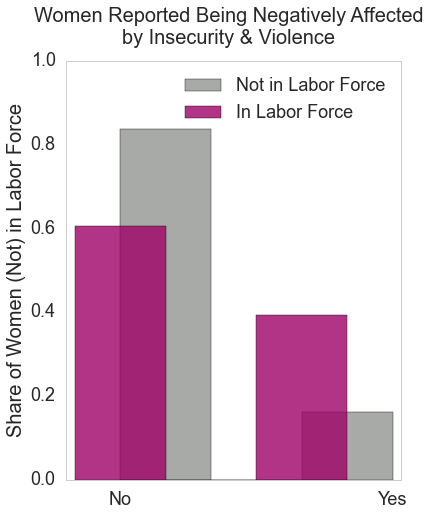

In [25]:
binary_fig(0,'upper right','Women Reported Being Negatively Affected \nby Insecurity & Violence')

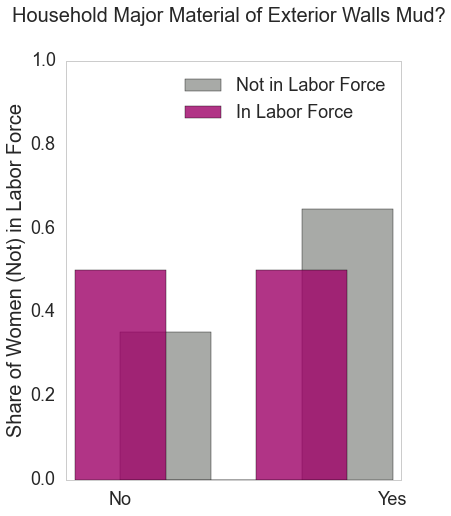

In [26]:
binary_fig(7,'upper right','Household Major Material of Exterior Walls Mud?')

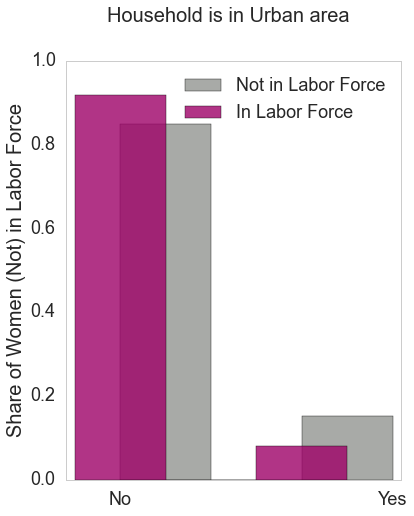

In [27]:
binary_fig(19,'upper right','Household is in Urban area')

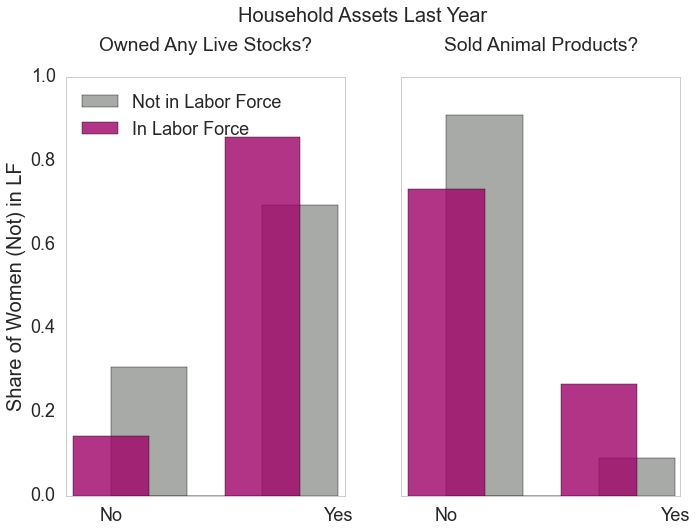

In [28]:
binary_fig2(5,1,'Owned Any Live Stocks?','Sold Animal Products?','upper left')
plt.suptitle('Household Assets Last Year',fontsize=20,y=1.03);

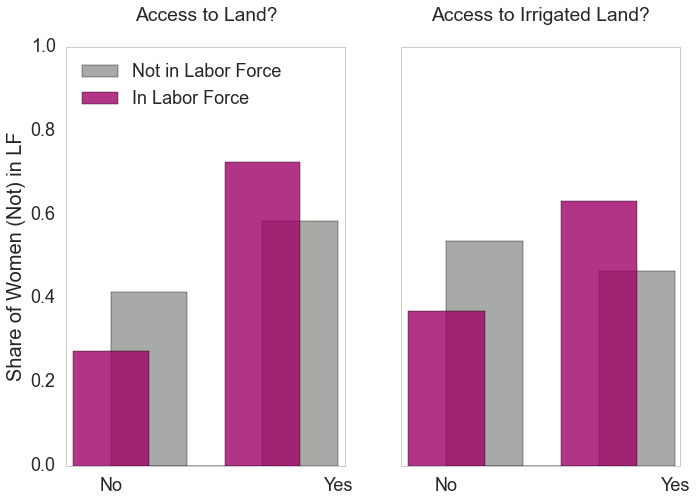

In [29]:
binary_fig2(8,6,'Access to Land?','Access to Irrigated Land?','upper left')

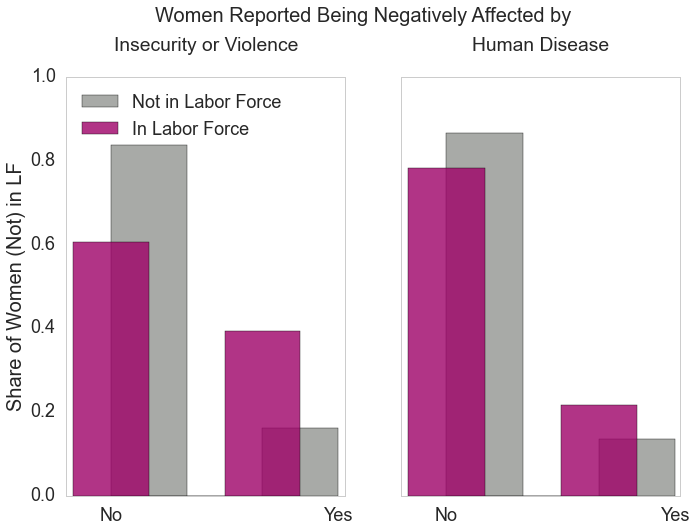

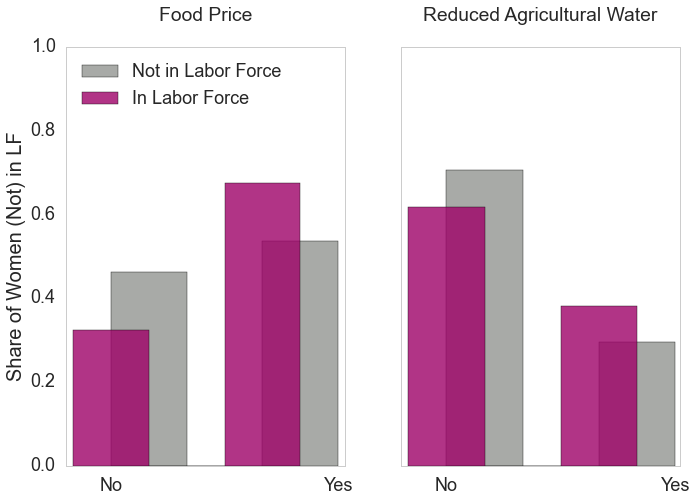

In [30]:
binary_fig2(0,16,'Insecurity or Violence','Human Disease','upper left')
plt.suptitle('Women Reported Being Negatively Affected by',fontsize=20,y=1.03);
binary_fig2(9,22,'Food Price','Reduced Agricultural Water','upper left')

### Histogram of Continuous Variables (most correlated with labor force participation)

In [31]:
correlations2=dict()
for var in NUMERICALNEW:
    correlations2[var] = abs(pearsonr(dftouse[(mask==1) & (dftouse[var].isnull()==False)][var], y[(mask==1) & (dftouse[var].isnull()==False)])[0])
myList2 = sorted(correlations2, key=correlations2.get, reverse=True)
#myList2[:50]

/Users/mariaschwarz/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


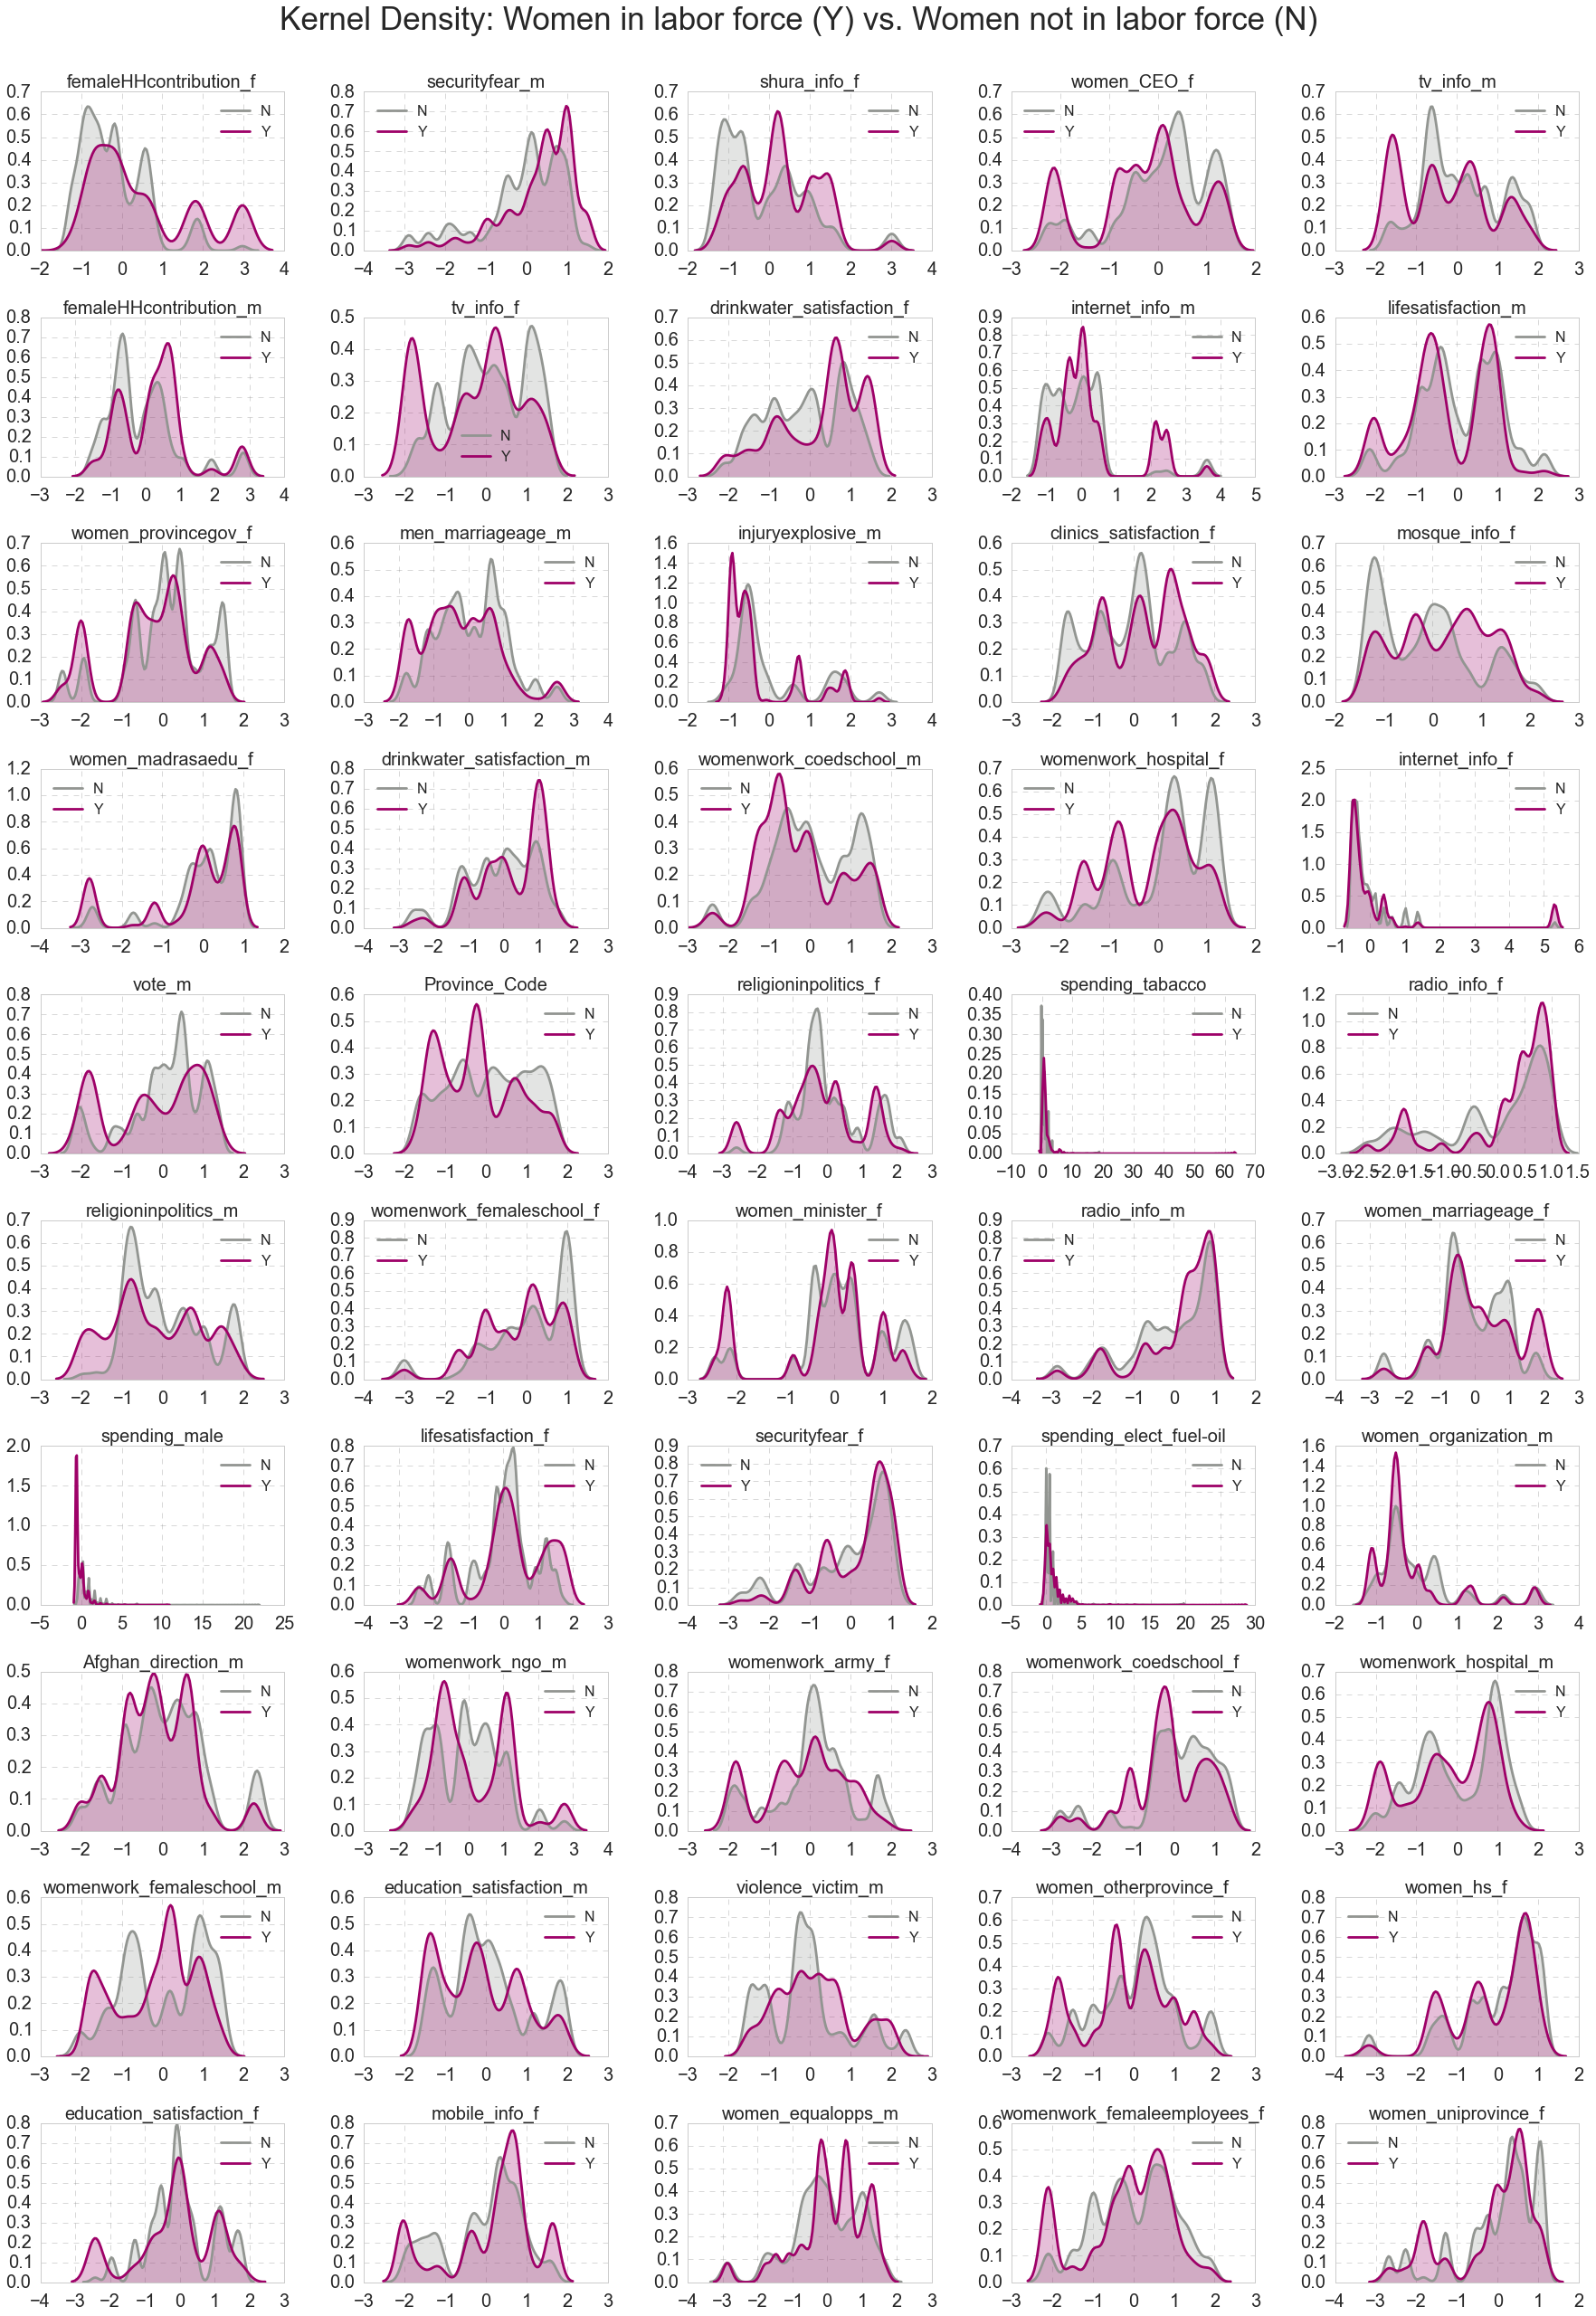

In [32]:
displaygraphs=50

bandwidth="scott"
fig = plt.figure(figsize=(25, 35))
#st = fig.suptitle("Kernel density estimates for each feature", fontsize="x-large")
for index in range(displaygraphs):
    # Add new subplot
    axes = fig.add_subplot(displaygraphs/5,5,index+1)
    data = np.array(dftouse[(mask==1) & (dftouse.labor_force==0) & (dftouse[myList2[index]].isnull()==False)][(myList2[index])])
    data2 = np.array(dftouse[(mask==1) & (dftouse.labor_force==1) & (dftouse[myList2[index]].isnull()==False)][(myList2[index])])
    
    axes.xaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1)
    axes.yaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1)
    
    # Add kernel for positive responses (grey)
    sns.kdeplot(data, shade=True, bw=bandwidth, color=colors[1],label="N")
    # Add kernel for negative responses (magenta)
    sns.kdeplot(data2, shade=True, bw=bandwidth, color=colors[2],label="Y")
    # Title
    axes.set_title(str(myList2[index]), fontsize=20)
    plt.tick_params(axis='both',labelsize=20)
    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, borderaxespad=0.)
    plt.legend(loc='best')

#st.set_y(0.91)
#fig.subplots_adjust(top=0.9)
fig.suptitle('Kernel Density: Women in labor force (Y) vs. Women not in labor force (N)',fontsize=35,y=1.02)
fig.tight_layout(pad=2.5);

In [33]:
def kernel_figfemale(index,loc,title):

    bandwidth="scott"
    fig,ax= plt.subplots(figsize=(8, 6))

    data = np.array(dftouse[(mask==1) & (dftouse.labor_force==0) & (dftouse[myList2[index]].isnull()==False)][(myList2[index])])
    data2 = np.array(dftouse[(mask==1) & (dftouse.labor_force==1) & (dftouse[myList2[index]].isnull()==False)][(myList2[index])])

    # Add kernel for positive responses (grey)
    sns.kdeplot(data, shade=True, bw=bandwidth, color=colors[1],label="Not in Labor Force")
    # Add kernel for negative responses (magenta)
    sns.kdeplot(data2, shade=True, bw=bandwidth, color=colors[2],label="In Labor Force")
    # Title
    plt.tick_params(axis='both',labelsize=20)

    ax.xaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1)
    ax.yaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1)

    plt.legend(loc=loc,fontsize=18)
    ax.set_title(title, fontsize=20)

    fig.tight_layout(pad=2.5);

In [34]:
def kernel_figmale(index,loc,title):

    bandwidth="scott"
    fig,ax= plt.subplots(figsize=(8, 6))

    data = np.array(dftouse[(mask==1) & (dftouse.labor_force==0) & (dftouse[myList2[index]].isnull()==False)][(myList2[index])])
    data2 = np.array(dftouse[(mask==1) & (dftouse.labor_force==1) & (dftouse[myList2[index]].isnull()==False)][(myList2[index])])

    # Add kernel for positive responses (grey)
    sns.kdeplot(data, shade=True, bw=bandwidth, color=colors[1],label="Not in Labor Force")
    # Add kernel for negative responses (magenta)
    sns.kdeplot(data2, shade=True, bw=bandwidth, color=colors[5],label="In Labor Force")
    
    # Title
    plt.tick_params(axis='both',labelsize=20)

    ax.xaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1)
    ax.yaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1)

    plt.legend(loc=loc,fontsize=18)
    ax.set_title(title, fontsize=20)

    fig.tight_layout(pad=2.5);

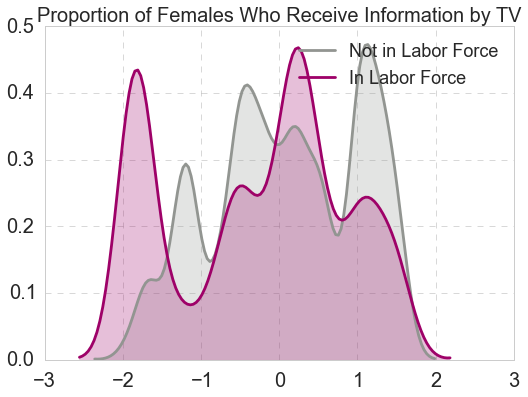

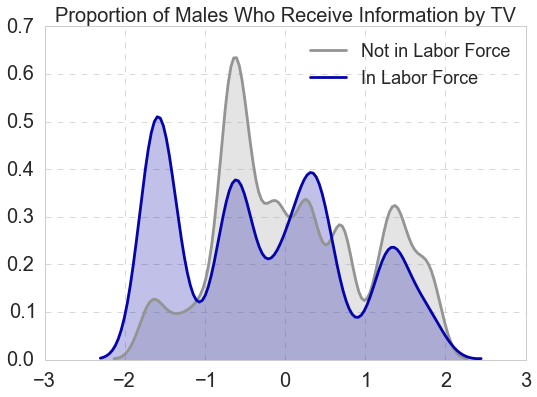

In [35]:
kernel_figfemale(6,'upper right','Proportion of Females Who Receive Information by TV')
kernel_figmale(4,'upper right','Proportion of Males Who Receive Information by TV')

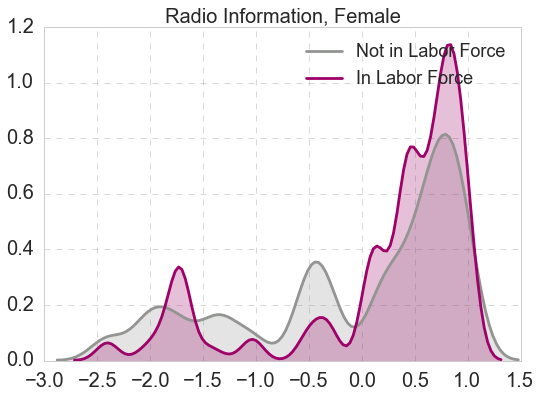

In [36]:
kernel_figfemale(24,'upper right','Radio Information, Female',)

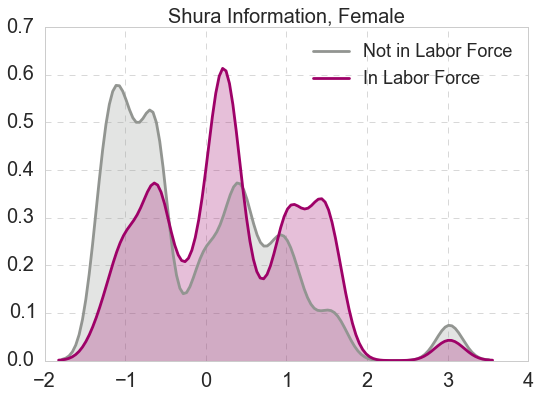

In [37]:
kernel_figfemale(2,'upper right','Shura Information, Female')

# Predictions

## Prediction Models: Establishing A Baseline

Our best baseline prediction is that no woman is working. 

Let us look at what the accuracy for that baseline estimate would be. In order to do this, we define a function that calculates the accuracy based on the confusion matrix as an input.

In [99]:
def accuracy(cmatrix):
    u=[[1., 0],[0, 1.]]
    score=np.sum(cmatrix*u)/np.sum(cmatrix)
    return score

In [100]:
from sklearn.metrics import confusion_matrix
cmatrix_baseline = confusion_matrix(ytest, np.zeros(len(Xtest)), )
print "Accuracy in the baseline estimate: %0.2f" % (accuracy(cmatrix_baseline))

Accuracy in the baseline estimate: 0.71


This reveals that our data is highly asymmetric - 71% of the women are not in the labor force. This means that of the working age, married women, 28% are classified as in the labor force. This means that **a classifier that predicts that EVERY woman is not in the labor force** has an accuracy of ~72%.  Given this, we have to aim to beat this number.  

## K-nearest neighbors with principal component analysis (PCA) 

To start with - and to limit the number of dimensions within our prediction model - we perform a principal component analysis (PCA). In a first step, we reduce our more than 300 variables to 60 dimensions, which can explain more than 98% of our variance in the explanatory variable. We then use these dimensions to predict labor force participation using a k-nearest neighbor classifier.

The classifier is picked using a gridsearch. Since feature selection (PCA) has to be within the train (and not the valiation) set to ensure no contamination in the train-validation loop.

We find that 27 neighbors is providing the best estimates with an training set accuracy of 84% and a test set accuracy of 83%.

The graph below shows how the space woudl be divided in two dimensions (only using the two dimensions with the highest explanatory power). The red area shows women classified as not in the labor force, while the blue area shows women classified as in the labor force. The accuracy here is at 81% for both the training and the test set. We can see that - by adding the other 58 dimensions - we could only increase test set accuracy by merely 2 percentage points.

In [40]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    plt.tick_params(axis='both',labelsize=15)
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("KNN Classifier with PCA Feature Engineering",fontsize=25)
    return ax,xx,yy

In [41]:
from sklearn.neighbors import KNeighborsClassifier
def classify(Xtrain, Xtest, ytrain, ytest, nbrs, plotit=True):
    clf= KNeighborsClassifier(nbrs)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    Xall=np.concatenate((Xtrain, Xtest))
    if plotit:
        print "Accuracy on training data: %0.2f" % (training_accuracy)
        print "Accuracy on test data:     %0.2f" % (test_accuracy)
        if Xtrain.shape[1]<=2:
            plt.figure()
            ax=plt.gca()
            points_plot(ax, np.array(Xtrain), np.array(Xtest), np.array(ytrain), np.array(ytest), clf, alpha=0.3, psize=20)
    return nbrs, training_accuracy, test_accuracy

In [42]:
# Cross-validation: Find accuracy score for parameter using k-fold cross-validation
from sklearn.cross_validation import KFold
from sklearn.decomposition import RandomizedPCA

def kneighbor_kfold(nbrs, X_train, y_train, pca2, n_folds=4):
    acctrain = 0
    accvalidate = 0
    varexp = 0
    j = 0
    for train, validate in KFold(len(X_train), n_folds, shuffle=True): # split data into train/test groups, 4 times    
        j +=1

        # Feature selection
        pca2 = pca2.fit(np.array(X_train[train]))
        varexp +=pca.explained_variance_ratio_.sum()
    
        X_tr = pca2.transform(np.array(X_train[train]))
        y_tr = np.array(y_train)[train]
        X_va = pca2.transform(np.array(X_train[validate]))
        y_va = np.array(y_train)[validate]

        
        # Create the data frames
        dfpca_tr = pd.DataFrame({"labor_force":y_tr, "label":np.where(y_tr==1, "labor force", "not in labor force")})
        for i in range(pca.explained_variance_ratio_.shape[0]):
            dfpca_tr["pc%i" % (i+1)] = X_tr[:,i]
    
        dfpca_va = pd.DataFrame({"labor_force":y_va, "label":np.where(y_va==1, "labor force", "not in labor force")})
        for i in range(pca.explained_variance_ratio_.shape[0]):
            dfpca_va["pc%i" % (i+1)] = X_va[:,i]
    
        VARTOUSEFEAT = [column for column in dfpca_tr.columns[2:]]
        nbrs, acc_tr, acc_va = classify(dfpca_tr[VARTOUSEFEAT], dfpca_va[VARTOUSEFEAT], 
                                    dfpca_tr["labor_force"], dfpca_va["labor_force"], nbrs, plotit=False)
        acctrain += acc_tr
        accvalidate += acc_va
    return nbrs, acctrain/n_folds, accvalidate/n_folds, varexp/n_folds

In [43]:
# Customized grid search for best value of nbrs

n_folds=4
pca = RandomizedPCA(n_components=60)
Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']

acctraindict=dict()
accvalidatedict=dict()
results=dict()
start = time.time()
print "Progress: ", 
for nbrs in xrange(1,61,10):
    print " nbrs = ", nbrs,  
    nbrs, acctrain, accval, varexp = kneighbor_kfold(nbrs, Xtrain, ytrain, pca, n_folds=4)
    acctraindict[nbrs] = acctrain
    accvalidatedict[nbrs] = accval
    results[nbrs] = (acctrain, accval, varexp)
nbrs0 = max(accvalidatedict, key=accvalidatedict.get)
print 
print "Optimal parameters after first round", nbrs0
print "Time after first round: %.0f seconds." % (time.time() - start)

print "Progress: ", 
for nbrs in xrange(max(nbrs0-8,0),nbrs0+10,2):
    print " nbrs = ", nbrs,  
    nbrs, acctrain, accval, varexp = kneighbor_kfold(nbrs, Xtrain, ytrain, pca, n_folds=4)
    acctraindict[nbrs] = acctrain
    accvalidatedict[nbrs] = accval
    results[nbrs] = (acctrain, accval, varexp)
nbrs1 = max(accvalidatedict, key=accvalidatedict.get)
print 
print "Optimal parameters after second round", nbrs1
print "Time after second round: %.0f seconds." % (time.time() - start)

Progress:   nbrs =  1  nbrs =  11  nbrs =  21  nbrs =  31  nbrs =  41  nbrs =  51
Optimal parameters after first round 21
Time after first round: 465 seconds.
Progress:   nbrs =  13  nbrs =  15  nbrs =  17  nbrs =  19  nbrs =  21  nbrs =  23  nbrs =  25  nbrs =  27  nbrs =  29
Optimal parameters after second round 27
Time after second round: 1255 seconds.


Accuracy on training data: 0.84
Accuracy on test data:     0.83
['pc1', 'pc2']
Accuracy on training data: 0.81
Accuracy on test data:     0.81


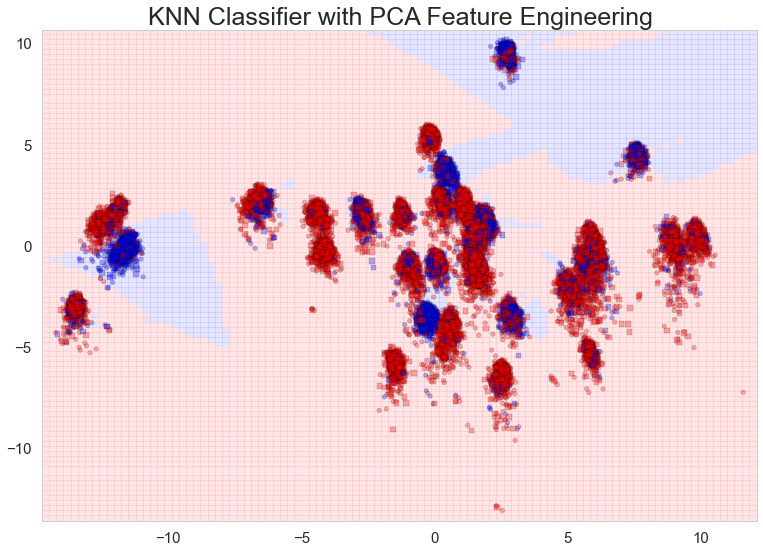

In [44]:
# First do feature selection on the entire data set

Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
pca = pca.fit(np.array(Xtrain))
pca.explained_variance_ratio_.sum()
    
X_tr = pca.transform(np.array(Xtrain))
y_tr = ytrain
X_te = pca.transform(np.array(Xtest))
y_te = ytest
        
# Create the data frames
dfpca_tr = pd.DataFrame({"labor_force":y_tr, "label":np.where(y_tr==1, "labor force", "not in labor force")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    dfpca_tr["pc%i" % (i+1)] = X_tr[:,i]
    
dfpca_te = pd.DataFrame({"labor_force":y_te, "label":np.where(y_te==1, "labor force", "not in labor force")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    dfpca_te["pc%i" % (i+1)] = X_te[:,i]
    
#print dfpca_va.head(), dfpca_tr.head()
VARTOUSEFEAT = [column for column in dfpca_tr.columns[2:]]
nbrs, acc_tr, acc_te = classify(dfpca_tr[VARTOUSEFEAT], dfpca_te[VARTOUSEFEAT], 
                            dfpca_tr["labor_force"], dfpca_te["labor_force"], nbrs1, plotit=True)


clfknn= KNeighborsClassifier(n_neighbors = nbrs1).fit(dfpca_tr[VARTOUSEFEAT], dfpca_tr["labor_force"])

# Plot for only two dimensions
VARTOUSEFEAT2 = VARTOUSEFEAT[:2]
print VARTOUSEFEAT2
nbrs2, acc_tr2, acc_te2 = classify(dfpca_tr[VARTOUSEFEAT2], dfpca_te[VARTOUSEFEAT2], 
                            dfpca_tr["labor_force"], dfpca_te["labor_force"], nbrs1, plotit=True)

In [45]:
#create a dictionary for classifiers
classifierdict=dict()
classifierdict['clfknn']=(clfknn, dfpca_te[VARTOUSEFEAT], dfpca_te["labor_force"])
print classifierdict['clfknn'][1].shape

(7301, 60)


## Define Supporting Functions

Before we run the other classifiers, we define supporting functionsn that help us run these classifiers more efficiently. These functions build on homework 3 and the labs.

In [46]:
"""
Function
--------
cv_optimize

Inputs
------
clf : an instance of a scikit-learn classifier
parameters: a parameter grid dictionary thats passed to GridSearchCV (see above)
X: a samples-features matrix in the scikit-learn style
y: the response vectors of 1s and 0s (+ives and -ives)
n_folds: the number of cross-validation folds (default 5)
score_func: a score function we might want to pass (default python None)
   
Returns
-------
The best estimator from the GridSearchCV, after the GridSearchCV has been used to
fit the model.
"""
from sklearn.grid_search import GridSearchCV

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

Train the model on the entire training set and test it on the test set using the optimal parameter for nbrs. Further, let us plot it for only the first two dimensions.  

In [47]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

Before we start running our various classifiers - to reduce computation time - we reduce our variables to the 100 most correlated with female labor force participation. We update our list VARTOUSE to just include these variables.

In [48]:
# Create a reduced variable list with top 100 most correlated variables
correlations.update(correlations2)
myList = sorted(correlations, key=correlations.get, reverse=True)
shortlisted=100
VARTOUSE = []
VARTOUSE = myList[:shortlisted]

## SVM Classifier

We begin with  the linear SVM model, which we run with a subset of 100 variables out of about 400 that we identified by checking the correlation scores between the variables, i.e. using the Pearson correlation coefficients.  We obtain an accuracy in prediction of 82% on or training set and 82% on our test set. That means that, if the model is used on new data (taken from the same dataset as our training data), it correctly predicts the labor force status for 82% of women.

In [49]:
from sklearn.svm import LinearSVC
clfsvm=LinearSVC(loss="hinge")
Cs=[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
xmatrix=dftouse[VARTOUSE].values
y=dftouse['labor_force'].values

xtrain = dftouse[mask]
ytrain = y[mask]
xtest = dftouse[~mask]
ytest = y[~mask]

In [50]:
start = time.time()
clfsvm, xtrain_svm, ytrain_svm, xtest_svm, ytest_svm = do_classify(LinearSVC(loss="hinge"), 
                                                           {"C": Cs}, dftouse,VARTOUSE, u'labor_force',1,
                                                           mask=mask)
print "Time elapsed: %.1f" % (time.time()-start)

classifierdict['clfsvm']=(clfsvm, xtest_svm, ytest_svm)
print classifierdict['clfsvm'][0]

using mask
BEST {'C': 1.0} 0.579277957147 [mean: 0.55891, std: 0.16287, params: {'C': 0.01}, mean: 0.57822, std: 0.15233, params: {'C': 0.1}, mean: 0.57928, std: 0.15940, params: {'C': 1.0}, mean: 0.54869, std: 0.14197, params: {'C': 10.0}, mean: 0.49316, std: 0.06192, params: {'C': 100.0}, mean: 0.55069, std: 0.08159, params: {'C': 1000.0}]
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.82
[[4873  346]
 [ 995 1087]]
########################################################
Time elapsed: 94.7
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)


/Users/mariaschwarz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [51]:
reuse_split=dict(Xtrain=xtrain_svm, Xtest=xtest_svm, ytrain=ytrain_svm, ytest=ytest_svm)

## Feature Selected SVM Classifier

For better generalization performance, running time requirements, and constraints and interpretational issues imposed by the problem itself, we also try to improve the model by using a features-selected SVM. This narrows our list of variables to the top 25 (see Table 1). The feature selection gives us an accuracy of 80% on training set and 79% on test set, which is not enough of an improvement to favor over the Linear SVM without feature selection. However, in real-world applications it might be more practical given the significant reduction in the number of variables required to make predictions.

For feature selection, we take the top 25 most correlated variables, i.e., those variables that have been described in detail in our exploratory data analysis section.

In [52]:
from scipy.stats.stats import pearsonr
correlations2=[]
dftousetrain=dftouse[mask]
for col in VARTOUSE:
    r=pearsonr(dftousetrain[col], dftousetrain['labor_force'])[0]
    correlations2.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations2).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)

,abscorr,corr
feature,,
femaleHHcontribution_f,0.305056,0.305056
violence,0.247680,0.247680
sold_animal_product,0.228038,0.228038
sold_live_animal,0.191014,0.191014
deliver_other,0.189540,0.189540
securityfear_m,0.186956,0.186956
shura_info_f,0.176514,0.176514
water_springunpr,0.170495,0.170495
women_CEO_f,0.170439,-0.170439


In [53]:
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [54]:
def pearson_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=pearsonr(v, y)
        i=i+1
    return np.abs(rs), pvals 

In [55]:
selectorlinearsvm = SelectKBest(k=25, score_func=pearson_scorer)
pipelinearsvm = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])

In [56]:
%%time
pipelinearsvm, xtrain_p, ytrain_p, xtest_p, ytest_p  = do_classify(pipelinearsvm, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,VARTOUSE, u'labor_force',1, reuse_split=reuse_split)

classifierdict['pipelinearsvm']=(pipelinearsvm, xtest_p, ytest_p)
print classifierdict['pipelinearsvm'][0]

using reuse split
BEST {'svm__C': 0.001} 0.725741121221 [mean: 0.61327, std: 0.05682, params: {'svm__C': 1e-05}, mean: 0.72574, std: 0.07659, params: {'svm__C': 0.001}, mean: 0.65395, std: 0.13776, params: {'svm__C': 0.01}, mean: 0.61426, std: 0.13029, params: {'svm__C': 0.1}, mean: 0.61608, std: 0.13018, params: {'svm__C': 1.0}, mean: 0.61785, std: 0.13248, params: {'svm__C': 10.0}, mean: 0.65671, std: 0.09617, params: {'svm__C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.80
Accuracy on test data:     0.79
[[5042  177]
 [1351  731]]
########################################################
Pipeline(steps=[('select', SelectKBest(k=25, score_func=<function pearson_scorer at 0x103588c08>)), ('svm', LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])
CPU times: user 26 s, sys: 195 ms, to

## Balanced SVM Classifier

We train a non-feature-selected linear SVM on a new balanced set to account for our skewed data. Our dataset is highly skewed in that only 28% of the women are actually in the labor force – the vast majority of women are not in the labor force. To account for this, we balance our dataset to give women in the labor force “more weight”; however, when we go to test the dataset, we keep our original testing sample unbalanced. The balanced SVM yields an accuracy of 71% on training set and 70% on test set, which is slightly worse than the linear SVM.

Processwise, we first create a balance dataset, then run the balanced classifier on this balanced dataset.

In [57]:
# Balanced (this is adapted from HW3)
xtrain, xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
jtrain=np.arange(0, ytrain.shape[0])
n_pos=len(jtrain[ytrain==1])
n_neg=len(jtrain[ytrain==0])
print n_pos, n_neg
ineg = np.random.choice(jtrain[ytrain==0], n_pos, replace=False)
alli=np.concatenate((jtrain[ytrain==1], ineg))
print alli.shape
xtrain_new = xtrain[alli]
ytrain_new = ytrain[alli]
print xtrain_new.shape, ytrain_new.shape
reuse_split_balanced=dict(Xtrain=xtrain_new, Xtest=xtest, ytrain=ytrain_new, ytest=ytest)

4721 12314
(9442,)
(9442, 100) (9442,)


Next, we run the balanced classifier.

In [58]:
start = time.time()
clfsvm_b, xtrain_b, ytrain_b, xtest_b, ytest_b = do_classify(LinearSVC(loss="hinge"), 
                                                           {"C": Cs}, dftouse,VARTOUSE, u'labor_force',1,
                                                           reuse_split=reuse_split_balanced)
print "Time elapsed: %.1f" % (time.time()-start)

classifierdict['clfsvm_b']=(clfsvm_b,  xtest_b, ytest_b)

using reuse split
BEST {'C': 100.0} 0.483372166914 [mean: 0.46325, std: 0.06717, params: {'C': 0.01}, mean: 0.47162, std: 0.06507, params: {'C': 0.1}, mean: 0.47193, std: 0.06296, params: {'C': 1.0}, mean: 0.45637, std: 0.05771, params: {'C': 10.0}, mean: 0.48337, std: 0.06154, params: {'C': 100.0}, mean: 0.43942, std: 0.05532, params: {'C': 1000.0}]
############# based on standard predict ################
Accuracy on training data: 0.70
Accuracy on test data:     0.71
[[3782 1437]
 [ 683 1399]]
########################################################
Time elapsed: 52.5


## Logistic Regression (Unbalanced)

In our approach, we use two types of regression methods: Logistic regression and ordinary least squares (OLS) with forward selection of parameters.

Logistic Regressions have the advantage over OLS classifiers that their probability estimates are always taking values between 0 and 1. Moreover, while OLS is estimating averages, logarithmic classifiers estimate the entire probability distribution. One disadvantage is – that because of this feature – coefficients are not interpretable in isolation (i.e., a coefficient of 0.2 on the variable ‘tv_info_f’ would have a different impact on the probability of being in the labor force for a 20 year old woman or a 40 year old woman).

We first estimate the logistic regression classifier using GridSearchCV and pick the optimal hyperparamether. We then obtain the regression coefficients from the logistic regression. Since the coefficients are not directly interpretable, we calculate the related change in probability of a switch from zero to one for each variable for a median woman. This means - we hold all other variables constant at the values of a median woman - and then calculate the related probability of being in the workforce if the variable in question takes value 1 and deduct the probability of being in the workforce when the variable in question takes value 0. For binary variables that can be interpreted as the change in the probability of being in the workforce for a median woman if she changes groups (e.g., owns livestock vs. does not own livestock). For continuous variables, it is interpreted as the change in probability if the median women changes by one standard deviation from 0 (the mean) to 1 in the variable in of discussion.

In [59]:
from sklearn.linear_model import LogisticRegression
start = time.time()
clflog, xtrain_r, ytrain_r, xtest_r, ytest_r = do_classify(LogisticRegression(penalty="l1"), 
                                                   {"C": Cs}, dftouse, VARTOUSE, u'labor_force', 1, 
                                                   reuse_split=reuse_split) 
print "Time elapsed: %.1f" % (time.time()-start)

classifierdict['clflog']=(clflog,xtest_r, ytest_r)
print classifierdict['clflog'][0]

using reuse split
BEST {'C': 0.01} 0.655943645436 [mean: 0.65594, std: 0.17562, params: {'C': 0.01}, mean: 0.60751, std: 0.15827, params: {'C': 0.1}, mean: 0.64491, std: 0.17394, params: {'C': 1.0}, mean: 0.58298, std: 0.17483, params: {'C': 10.0}, mean: 0.57399, std: 0.17404, params: {'C': 100.0}, mean: 0.56953, std: 0.17424, params: {'C': 1000.0}]
############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.81
[[5019  200]
 [1156  926]]
########################################################
Time elapsed: 222.3
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


In [60]:
# Let us find the variables with the highest predictive power for the "median" woman in the dataset 
logcoeff = pd.DataFrame({"variables": VARTOUSE, "coefficients":clflog.coef_[0], "abscoeff": abs(clflog.coef_[0]), "median": np.median(xtrain_r, axis=0)})
logcoeff = logcoeff.sort("abscoeff", ascending=False)
#print logcoeff

def log_ratio(df, intercept=True):
    logprobs = []
    for var in df.variables.values:
        intercept = intercept*1
        allothers =  sum(df[df.variables!=var]["coefficients"]*df[df.variables!=var]["median"])
        var0 = 0
        var1 = 1
        e0 = np.exp(intercept + allothers + var0)
        e1 = np.exp(intercept + allothers + var1)
        prob0 = e0/(1+e0)
        prob1 = e1/(1+e1)
        logprobs.append(prob1-prob0)
    return logprobs
        
logcoeff["diffprob"] = log_ratio(logcoeff)      
logcoeff["absdiffprob"] = abs(logcoeff["diffprob"])
logcoeff = logcoeff.sort("absdiffprob", ascending=True)

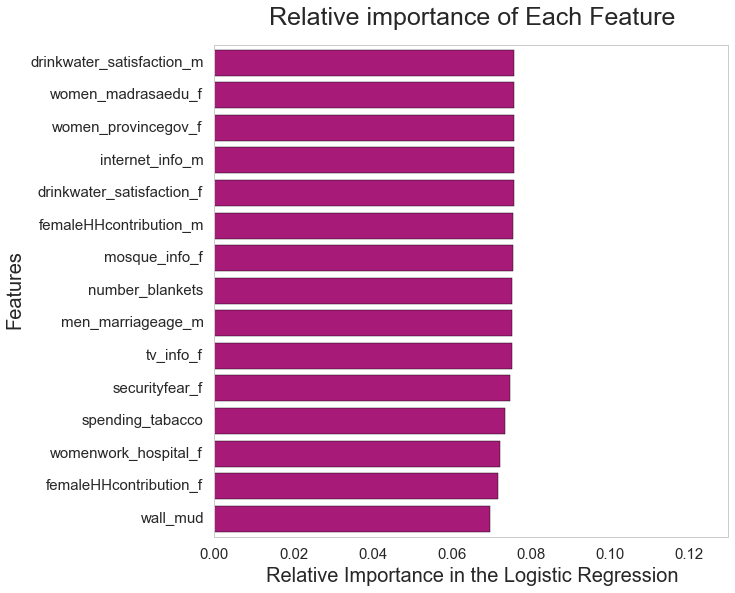

In [61]:
subdf = logcoeff[:15]
importance_list = subdf["absdiffprob"]
name_list = list(subdf["variables"])

plt.figure(figsize=(10, 8))

val = importance_list    # the bar lengths
pos = np.arange(len(name_list))   # the bar centers on the y axis

plt.barh(pos,val, color=colors[2],alpha=0.9, align='center')
plt.yticks(pos, name_list)
plt.grid(False)

plt.xlim(0,0.13)
plt.xlabel('Relative Importance in the Logistic Regression', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.tick_params(axis='both',labelsize=15)
plt.title('Relative importance of Each Feature', fontsize=25,y=1.03)
plt.tight_layout(pad=0)
plt.margins(0,0.01)
plt.show();

## OLS Regression with Forward Selection Based on List Provided in Other Methods

Ordinary Least Squares (OLS) – or the Linear Probability Model: We use a forward select model with 50 variables. OLS models are typically strong in predicting average outcomes: each coefficient can be interpreted as the average change in the outcome (probability of being in the labor force) based on a change in the underlying explanatory variable (while not changing any of the other variables). For example, if the coefficient on “owns livestock” was 0.2, then the probability of a woman being in the labor force, on average is 7.7% higher for women who own livestock, compared to women who do not own livestock if they are similar on all other dimensions (e.g., age, education, etc). The most relevant coefficients are illustrated in the regression output table below: please note that due to standardization of continuous variables, the coefficient on continuous variables can be interpreted as the change in the probability of being in the labor force if a variable changes by one standard deviation; the coefficients on dummy variables can be interpreted as the difference in the average of the two groups.

In [62]:
Xnames = myList[:30]
Xnames.append("labor_force")

In [63]:
ols_df = dftouse[Xnames]
ols_df.head()

,femaleHHcontribution_f,violence,sold_animal_product,sold_live_animal,deliver_other,securityfear_m,shura_info_f,water_springunpr,women_CEO_f,tv_info_m,femaleHHcontribution_m,tv_info_f,owns_livestock,drinkwater_satisfaction_f,internet_info_m,lifesatisfaction_m,women_provincegov_f,access_irr_land,men_marriageage_m,injuryexplosive_m,clinics_satisfaction_f,mosque_info_f,women_madrasaedu_f,drinkwater_satisfaction_m,wall_mud,womenwork_coedschool_m,womenwork_hospital_f,owns_land,internet_info_f,vote_m,labor_force
0,-0.960453,0,0,1,0,-1.973384,-0.666130,0,0.345749,-0.179843,-1.076836,-0.524236,1,-1.217764,-0.955703,1.603407,0.475869,1,-0.567075,-0.366859,-0.478110,-1.106145,0.885968,-1.380678,0,1.238393,1.109465,1,-0.505028,1.030902,0
1,0.225853,0,0,1,0,-0.089126,1.001172,0,0.286493,-0.096972,2.848153,-0.220889,0,-0.735471,-1.143662,-0.610626,0.381822,0,-0.447463,1.573408,-1.388117,1.750357,-0.597897,-1.220951,0,-0.473819,-1.006671,0,-0.144738,0.042288,1
2,-0.153866,0,0,0,0,-0.444411,-0.943962,0,0.152212,1.336677,-0.551856,0.689270,1,-0.644298,-0.271231,0.627118,0.374655,0,2.540505,-0.597558,-0.024438,-0.796311,0.885968,-0.486484,0,0.713856,0.470815,0,-0.375224,0.992086,0
3,-0.770667,0,0,0,0,-1.380662,0.329494,0,0.469047,0.698999,-0.584905,1.044795,1,-0.916921,0.450528,-0.911252,0.067891,1,1.131828,-0.444983,-1.124784,0.263810,0.211926,-2.595975,1,1.215402,0.339125,1,0.394812,0.508174,0
4,-0.787962,0,0,1,0,-2.419549,0.798987,1,1.017177,0.246668,1.911441,0.285291,1,-1.633578,-0.521597,0.956328,1.175841,1,1.012129,-0.396800,-0.549280,0.328227,0.742747,-1.222975,1,1.552795,1.109605,1,-0.395209,1.112207,1


In [64]:
import statsmodels.formula.api as smf

# Ajduste from http://planspace.org/20150423-forward_selection_with_statsmodels/

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score, i = 0.0, 0.0, 0
    while remaining and current_score == best_new_score:
        #print i
        scores_with_variables = []
        for variable in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [variable]))
            score = smf.ols(formula, data).fit().rsquared_adj
            #print score
            scores_with_variables.append((score, variable))
        scores_with_variables.sort()
        best_new_score, best_variable = scores_with_variables.pop()
        if current_score < best_new_score:
            remaining.remove(best_variable)
            #print remaining
            selected.append(best_variable)
            #print selected
            current_score = best_new_score
        i = i+1
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model, selected

In [65]:
model, selected = forward_selected(ols_df, "labor_force")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            labor_force   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     355.9
Date:                Thu, 10 Dec 2015   Prob (F-statistic):               0.00
Time:                        20:58:47   Log-Likelihood:                -10726.
No. Observations:               24336   AIC:                         2.151e+04
Df Residuals:                   24306   BIC:                         2.175e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     0.1636      0.006     25.183      0.000         0.151     0.176
femaleHHcontribution_f        0.1134      0.004     26.726      0.000         0.105     0.122
violence                      0.0536      0.007      7.629      0.000         0.040     0.067
deliver_other                 0.1022      0.008     13.120      0.000         0.087     0.117
owns_livestock                0.0768      0.007     11.795      0.000         0.064     0.090
internet_info_m               0.1476      0.005     29.966      0.000         0.138     0.157
womenwork_coedschool_m       -0.1051      0.008    -13.851      0.000        -0.120    -0.090
injuryexplosive_m            -0.1173      0.004    -26.146      0.000        -0.126    -0.109
shura_info_f                  0.0688      0.008      8.776      0.000         0.053     0.084
wall_mud                     -0.0425      0.006     -7.108      0.000        -0.054    -0.031
internet_info_f              -0.1072      0.005    -23.471      0.000        -0.116    -0.098
clinics_satisfaction_f        0.0747      0.003     21.396      0.000         0.068     0.082
vote_m                        0.0952      0.006     14.714      0.000         0.083     0.108
sold_animal_product           0.1059      0.009     12.207      0.000         0.089     0.123
tv_info_m                    -0.0314      0.007     -4.472      0.000        -0.045    -0.018
lifesatisfaction_m           -0.0858      0.005    -15.970      0.000        -0.096    -0.075
womenwork_hospital_f         -0.1769      0.008    -22.111      0.000        -0.193    -0.161
women_madrasaedu_f            0.1464      0.008     18.089      0.000         0.131     0.162
securityfear_m               -0.0903      0.005    -18.958      0.000        -0.100    -0.081
drinkwater_satisfaction_m     0.0441      0.007      6.646      0.000         0.031     0.057
access_irr_land               0.0524      0.006      9.467      0.000         0.042     0.063
water_springunpr              0.0514      0.008      6.328      0.000         0.035     0.067
women_CEO_f                   0.1545      0.013     12.209      0.000         0.130     0.179
tv_info_f                    -0.0930      0.008    -11.906      0.000        -0.108    -0.078
femaleHHcontribution_m        0.0369      0.004      8.772      0.000         0.029     0.045
mosque_info_f                -0.0501      0.007     -6.990      0.000        -0.064    -0.036
women_provincegov_f          -0.0828      0.011     -7.482      0.000        -0.105    -0.061
men_marriageage_m             0.0256      0.005      5.419      0.000         0.016     0.035
sold_live_animal              0.0276      0.006      4.271      0.000         0.015     0.040
drinkwater_satisfaction_f     0.0173      0.006      2.920      0.003      

##Decision tree learning and random forests

To achieve better prediction results, we switch to another set of classifiers:  decision trees and random forests. Decision tree learning uses a decision tree as a predictive model which maps observations about an item to conclusions about the item’s target value. Random forests are an ensemble learning method that constructs a multitude of decision trees and outputs the mean prediction of the individual trees. Random decision forests correct for decision trees’ habit of overfitting to their training set.

In [66]:
# Plot tree containing only two covariates
from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    # Create a meshgrid as our test data
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]

    # Predict the class
    Z = clfTree1.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    # and testing points
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")
        
    plt.grid(False)
    plt.xlabel(lab[0],fontsize=20)
    plt.ylabel(lab[1],fontsize=20)
    plt.tick_params(axis='both',labelsize=15)
    plt.title("Boundary for Decision Tree Classifier",fontsize=25);

In the last lab we went over some metrics that 
Usually, the goal is to identify the members of the positive class (the rare class) successfully -- this could be either the good wines or the patients presenting a rare disease. It is common practice to define the following ratios:

The **recall** rate (also called the sensitivity or the true positive rate) is the ratio of true positive guesses among all positives:
$$\text{recall} = \frac{TP}{P}=\frac{TP}{TP+FN}.$$
The **precision** is the ratio of the true positive guesses over all the positive guesses:
$$\text{precision} = \frac{TP}{TP+FP}.$$
Because precision and recall both provide valuable information about the quality of a classifier, we often want to combine them into a single general-purpose score. The **F1** score is defined as the harmonic mean of recall and precision:
$$F_1 = \frac{2\times\text{recall}\times\text{precision}}{\text{recall} + \text{precision}}.$$

The harmonic mean of two numbers is closer to the smaller of the two numbers than the standard arithmetic mean. The F1 score thus tends to favor classifiers that are strong in both precision and recall, rather than classifiers that emphasize one at the cost of the other.

###Fit A Decision Tree and Boundarie: An Example 
We'll be optimizing over two options here: max_depth - the maximum depth of the tree, min_samples_leaf - the minimum number of samples required to be at a leaf node.

In [67]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df, 
                                                     ['women_CEO_f', 'tv_info_f'],'labor_force', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask


/Users/mariaschwarz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'max_depth': 3, 'min_samples_leaf': 1} 0.42270165204 [mean: 0.33922, std: 0.24620, params: {'max_depth': 1, 'min_samples_leaf': 1}, mean: 0.33922, std: 0.24620, params: {'max_depth': 1, 'min_samples_leaf': 2}, mean: 0.33922, std: 0.24620, params: {'max_depth': 1, 'min_samples_leaf': 3}, mean: 0.33922, std: 0.24620, params: {'max_depth': 1, 'min_samples_leaf': 4}, mean: 0.33922, std: 0.24620, params: {'max_depth': 1, 'min_samples_leaf': 5}, mean: 0.33922, std: 0.24620, params: {'max_depth': 1, 'min_samples_leaf': 6}, mean: 0.32274, std: 0.24729, params: {'max_depth': 2, 'min_samples_leaf': 1}, mean: 0.32274, std: 0.24729, params: {'max_depth': 2, 'min_samples_leaf': 2}, mean: 0.32274, std: 0.24729, params: {'max_depth': 2, 'min_samples_leaf': 3}, mean: 0.32274, std: 0.24729, params: {'max_depth': 2, 'min_samples_leaf': 4}, mean: 0.32274, std: 0.24729, params: {'max_depth': 2, 'min_samples_leaf': 5}, mean: 0.32274, std: 0.24729, params: {'max_depth': 2, 'min_samples_leaf': 6}, mean

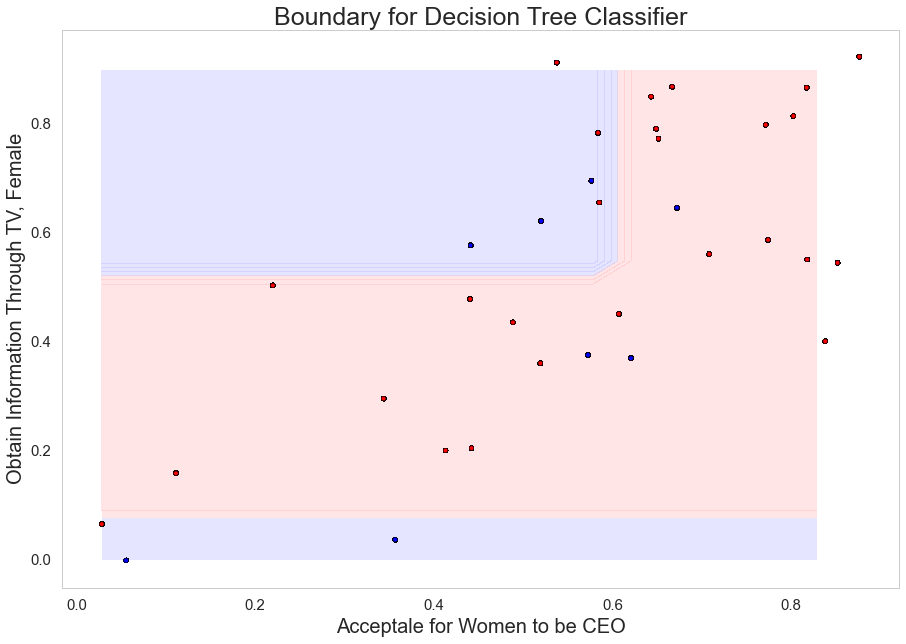

In [68]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['Acceptale for Women to be CEO', 'Obtain Information Through TV, Female'], alpha = 1, plot_test = False)

###Decision Tree Learning

Our decision tree approach on the 50 most correlated variables yields an accuracy of 81% on both the training and the test set, but given the above problem is not the most useful method to go about our problem


In [69]:
Xnames = myList[:50]

In [70]:
#Decision Tree
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain_t, ytrain_t, Xtest_t, ytest_t = do_classify(clfTree2, parameters, dftouse, 
                                                     Xnames,'labor_force', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

classifierdict["clfTree2"]=(clfTree2,Xtest_t, ytest_t)

using mask


/Users/mariaschwarz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'max_depth': 3, 'min_samples_leaf': 1} 0.43402243097 [mean: 0.19730, std: 0.19069, params: {'max_depth': 1, 'min_samples_leaf': 1}, mean: 0.19730, std: 0.19069, params: {'max_depth': 1, 'min_samples_leaf': 2}, mean: 0.19730, std: 0.19069, params: {'max_depth': 1, 'min_samples_leaf': 3}, mean: 0.19730, std: 0.19069, params: {'max_depth': 1, 'min_samples_leaf': 4}, mean: 0.19730, std: 0.19069, params: {'max_depth': 1, 'min_samples_leaf': 5}, mean: 0.19730, std: 0.19069, params: {'max_depth': 1, 'min_samples_leaf': 6}, mean: 0.19730, std: 0.19069, params: {'max_depth': 1, 'min_samples_leaf': 7}, mean: 0.19730, std: 0.19069, params: {'max_depth': 1, 'min_samples_leaf': 8}, mean: 0.19730, std: 0.19069, params: {'max_depth': 1, 'min_samples_leaf': 9}, mean: 0.19730, std: 0.19069, params: {'max_depth': 1, 'min_samples_leaf': 10}, mean: 0.34562, std: 0.26392, params: {'max_depth': 2, 'min_samples_leaf': 1}, mean: 0.34562, std: 0.26392, params: {'max_depth': 2, 'min_samples_leaf': 2}, mea

In Random Forests we do the following $b$ times:

1. Take a random subsample of your data
2. Select m variables at random out of all M possible variables (independently for each node).
3. Find the best split on the selected m variables. Build out the entire tree.
4. repeat

We take a majority vote the same as before. 

We'll be optimizing two options: `n_estimators` - the number of trees in the forest, `max_features` - the number of features to consider when looking for the best split.

###Random Forest

To obtain a list of variables and correct for overfitting, we  use a random forest approach. This not only yields a list of variables ordered by relative importance to predicting labor force participation, but also an accuracy of 90% on our training set and 80% on or test set.

In [71]:
from sklearn.ensemble import RandomForestClassifier
clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain_f, ytrain_f, Xtest_f, ytest_f = do_classify(clfForest, parameters, 
                                                       dftouse, Xnames, 'labor_force', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')
classifierdict['clfForest']=(clfForest,Xtest_f, ytest_f)

using mask


/Users/mariaschwarz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 1} 0.381830328646 [mean: 0.38183, std: 0.07646, params: {'n_estimators': 1}, mean: 0.31142, std: 0.12043, params: {'n_estimators': 2}, mean: 0.35399, std: 0.14130, params: {'n_estimators': 3}, mean: 0.29543, std: 0.13042, params: {'n_estimators': 4}, mean: 0.36584, std: 0.14731, params: {'n_estimators': 5}, mean: 0.27666, std: 0.09858, params: {'n_estimators': 6}, mean: 0.34648, std: 0.12587, params: {'n_estimators': 7}, mean: 0.33129, std: 0.16941, params: {'n_estimators': 8}, mean: 0.36958, std: 0.15873, params: {'n_estimators': 9}, mean: 0.38028, std: 0.14411, params: {'n_estimators': 10}, mean: 0.36518, std: 0.17052, params: {'n_estimators': 11}, mean: 0.36434, std: 0.16156, params: {'n_estimators': 12}, mean: 0.36529, std: 0.18300, params: {'n_estimators': 13}, mean: 0.34343, std: 0.17619, params: {'n_estimators': 14}, mean: 0.35251, std: 0.18302, params: {'n_estimators': 15}, mean: 0.33876, std: 0.18255, params: {'n_estimators': 16}, mean: 0.34936, std: 0.17

### Relative Importance of Random Forest Variables
We can get a measure of how important a variable is from a random forest, it's essentially a measure of how well each particular variable is able to predict well when it is selected

In [72]:
dftouse.head()

,level_0,index,age,Province_Code,province,radio_info_m,tv_info_m,mobile_info_m,internet_info_m,Afghan_direction_m,violence_victim_m,religioninpolitics_m,women_equalopps_m,women_workouthome_m,femaleHHcontribution_m,women_organization_m,mosque_info_m,shura_info_m,drinkwater_satisfaction_m,irrigationwater_satisfaction_m,electricity_satisfaction_m,clinics_satisfaction_m,medicine_satisfaction_m,education_satisfaction_m,roads_satisfaction_m,vote_m,women_madrasaedu_m,women_primary_m,women_hs_m,women_uniprovince_m,women_otherprovince_m,women_abroad_m,womenwork_gov_m,womenwork_ngo_m,womenwork_hospital_m,womenwork_army_m,women_marriageage_m,men_marriageage_m,lifesatisfaction_m,securityfear_m,injuryexplosive_m,womenwork_femaleschool_m,womenwork_coedschool_m,womenwork_femaleemployees_m,womenwork_coedemployees_m,women_leadCDC_m,women_provincegov_m,women_CEO_m,women_minister_m,women_president_m,...,kitchen_open,kitchen_other,kitchen_miss,access_dwell_foothpath,access_dwell_unpaved,access_dwell_paved,access_dwell_miss,fuel_animal,fuel_bushes,fuel_firewood,fuel_crop,fuel_coal,fuel_oil,fuel_gas,fuel_electricity,fuel_other,heat_no,heat_ping,heat_firewood,heat_animal,heat_crop,heat_coal,heat_petrol,heat_gas,heat_electiricity,heat_other,toilet_openpit,toilet_latrine,toilet_impr_latrine,toilet_flush,toilet_none,toilet_dearan,toilet_other,toilet_miss,water_wellpub,water_wellpriv,water_pumpub,water_pumpriv,water_wells,water_springunpr,water_springprot,water_pipedpriv,water_pipedmuni,water_kariz,water_river,water_tanker,water_bottle,water_other,water_miss,birthcert_child
0,0,-1.739051,0.108970,-0.053529,Badakhshan,-1.769660,-0.179843,0.872786,-0.955703,0.477199,-1.423529,1.072631,1.000796,1.074872,-1.076836,-0.459197,1.685773,1.019558,-1.380678,-0.579099,-0.342980,0.566271,0.561794,1.153053,-0.708710,1.030902,1.023259,1.324766,1.193355,1.109973,-0.048807,-1.147487,0.621532,-0.867315,1.531168,-0.357689,-0.977367,-0.567075,1.603407,-1.973384,-0.366859,1.454162,1.238393,-0.016678,-0.774277,0.819219,0.117465,-0.352144,-0.071762,-1.166440,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,-1.738908,-1.341555,1.397155,Badghis,-0.630316,-0.096972,-1.123639,-1.143662,-0.541343,-1.082249,0.583155,-0.620998,-0.931433,2.848153,-1.193018,0.744497,1.445239,-1.220951,-0.921141,-1.243243,-2.721015,-1.363063,-1.260649,-1.752266,0.042288,-0.430103,-0.471623,0.007163,-0.755736,-0.410026,-0.286685,-0.667839,-0.076762,-0.924336,0.144683,0.336346,-0.447463,-0.610626,-0.089126,1.573408,0.210700,-0.473819,-0.054427,0.374570,-0.222547,0.144223,0.206621,-0.079416,0.403898,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,-1.738766,0.834233,-0.882491,Baghlan,0.743992,1.336677,0.103213,-0.271231,0.288490,0.408676,-0.676378,1.152674,1.049700,-0.551856,-0.221372,0.350420,-0.966059,-0.486484,1.056077,-0.514695,0.319406,-0.030031,1.187301,-0.609011,0.992086,0.722530,0.827923,0.830379,0.860216,0.015776,-0.342458,0.579560,-0.329298,0.896084,-0.497294,1.813711,2.540505,0.627118,-0.444411,-0.597558,1.099554,0.713856,-0.512913,-0.816974,0.514182,0.180695,0.039213,0.716947,-0.149052,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,-1.738624,1.075987,0.360953,Balkh,-0.286851,0.698999,0.703827,0.450528,-0.923711,-1.199246,0.141991,1.044197,1.311340,-0.584905,-0.509785,0.563641,0.515277,-2.595975,-1.578358,0.421474,-1.569788,-1.466008,-0.983475,-0.987698,0.508174,0.880350,0.787262,1.131089,1.333755,0.861575,0.665357,1.301986,1.179432,0.970883,0.895767,1.039302,1.131828,-0.911252,-1.380662,-0.444983,1.050796,1.215402,1.346295,0.965823,0.888251,1.469389,0.760479,1.036086,0.733024,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,-1.738481,1.196864,-0.778870,Bamyan,-2.049108,0.246668,-0.075481,-0.521597,-0.296340,-1.460927,-0.810184,0.972672,1.873723,1.911441,-0.94

In [73]:
importance_list = clfForest.feature_importances_
name_list = dftouse.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))

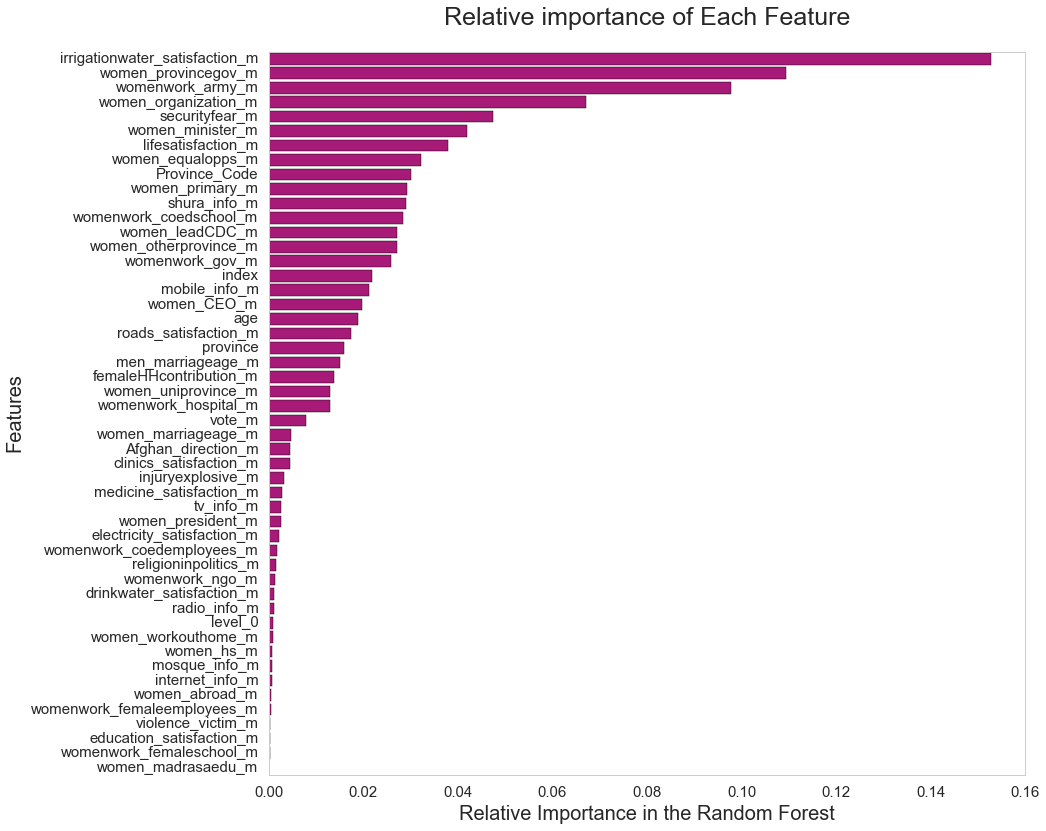

In [74]:
plt.figure(figsize=(15, 12))

val = importance_list    # the bar lengths
pos = np.arange(len(name_list))+.5    # the bar centers on the y axis

plt.barh(pos,val, color=colors[2],alpha=0.9, align='center')
plt.yticks(pos, name_list)
plt.grid(False)

plt.xlabel('Relative Importance in the Random Forest', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.tick_params(axis='both',labelsize=15)
plt.title('Relative importance of Each Feature', fontsize=25,y=1.03)
plt.tight_layout(pad=2.5);
plt.show();

##Ensemble Methods

Ensemble methods generalize this idea of putting many weak classifiers together (in a clever way) to build very accurate predictors. We saw this before with Random Forests and Bagging in the previous section. In this section we'll concentrate on a few particular Ensemble Methods

### AdaBoost Classifier
AdaBoost is short for Adaptive Boosting, the idea is quite simple. First you have some base classifier, like a Decision tree for example. 

First you assign to each of your n data points a weight of $w_i = 1/n$, then you do:

1. fit that classifier (e.g. tree) on all your data, weighted by $w_i$
2. test to see how well your classifier predicts your data
3. data points that are miss-classified get a slightly higher weight, but update all the weights to $w_{i, new} = w_{i} \exp({\alpha_{t, x_i, y_i}})$

${\alpha_{t, x_i, y_i}}$ is some number that is large when $y_i$ is correctly classified and small otherwise.

What this means is that every successive classifier (tree) puts more emphasis on classifying data points that the previous classifier missed. In this way each classifier can concentrate on a subset of the data.


In [75]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, xtrain_a, ytrain_a, xtest_a, ytest_a = do_classify(clfAda, parameters, 
                                                       df, Xnames, 'labor_force', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

classifierdict['clfAda']=(clfAda,xtest_a, ytest_a)

using mask


/Users/mariaschwarz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 22} 0.436965729955 [mean: 0.41005, std: 0.19279, params: {'n_estimators': 10}, mean: 0.41084, std: 0.19275, params: {'n_estimators': 11}, mean: 0.41090, std: 0.19287, params: {'n_estimators': 12}, mean: 0.41501, std: 0.19387, params: {'n_estimators': 13}, mean: 0.41602, std: 0.19152, params: {'n_estimators': 14}, mean: 0.42829, std: 0.16117, params: {'n_estimators': 15}, mean: 0.41147, std: 0.16044, params: {'n_estimators': 16}, mean: 0.42265, std: 0.14545, params: {'n_estimators': 17}, mean: 0.42123, std: 0.14121, params: {'n_estimators': 18}, mean: 0.43045, std: 0.15235, params: {'n_estimators': 19}, mean: 0.42602, std: 0.15911, params: {'n_estimators': 20}, mean: 0.42841, std: 0.16019, params: {'n_estimators': 21}, mean: 0.43697, std: 0.15447, params: {'n_estimators': 22}, mean: 0.42474, std: 0.15842, params: {'n_estimators': 23}, mean: 0.42878, std: 0.15442, params: {'n_estimators': 24}, mean: 0.42845, std: 0.15511, params: {'n_estimators': 25}, mean: 0.43298,

###Gradient Boost Classifier

This classifier is also an ensemble method with trees as its base classifier, like AdaBoost it creates a sequence of classifiers that 'correct each other' sequentially. 

In [76]:
Xnames = myList[:30]

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, xtrain_g, ytrain_g, xtest_g, ytest_g = do_classify(clfGB, parameters, 
                                                       df, Xnames, 'labor_force', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

classifierdict['clfGB']=(clfGB,xtest_g, ytest_g)

using mask


/Users/mariaschwarz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 54, 'max_depth': 1} 0.421900599655 [mean: 0.28445, std: 0.25769, params: {'n_estimators': 30, 'max_depth': 1}, mean: 0.32298, std: 0.25388, params: {'n_estimators': 31, 'max_depth': 1}, mean: 0.38404, std: 0.23735, params: {'n_estimators': 32, 'max_depth': 1}, mean: 0.32298, std: 0.25388, params: {'n_estimators': 33, 'max_depth': 1}, mean: 0.35745, std: 0.23708, params: {'n_estimators': 34, 'max_depth': 1}, mean: 0.35745, std: 0.23708, params: {'n_estimators': 35, 'max_depth': 1}, mean: 0.35745, std: 0.23708, params: {'n_estimators': 36, 'max_depth': 1}, mean: 0.38404, std: 0.23735, params: {'n_estimators': 37, 'max_depth': 1}, mean: 0.37110, std: 0.24127, params: {'n_estimators': 38, 'max_depth': 1}, mean: 0.37110, std: 0.24127, params: {'n_estimators': 39, 'max_depth': 1}, mean: 0.37110, std: 0.24127, params: {'n_estimators': 40, 'max_depth': 1}, mean: 0.37110, std: 0.24127, params: {'n_estimators': 41, 'max_depth': 1}, mean: 0.37502, std: 0.24219, params: {'n_e

# Evaluation of Results

We began by examining the indicators that best predict female labor force participation and examine the correlations of several key variables.  From this, we begin by examining several different models and we evaluate them along 3 metrics:

1. Accuracy  – The higher the accuracy, the happier we are, but this isn’t the only metric we use.  Accuracy is important to ensure that we are not over fitting our models to our training dataset. The larger the accuracy gap between the training and testing dataset, the more skeptical we are about the model.
2. ROC Analysis – The receiver operating characteristic (ROC) or ROC curve visualizes the performance of a binary classifier system as its threshold is varied. To do this, we plot the true positive rate against the false positive rate at various threshold settings. The larger the area under the ROC curve, the better our classifiers perform.
3. Average Utility Analysis – Along with accuracy and performance, we want to keep in mind the costs associated with government policy programs and the benefits accrued on the average level. What are the costs associated with implementing a policy per women? What is the benefit or gain per woman? We measure this in terms of utility and our goal is to maximize utility.

Let us go in more detail on that:

Along with accuracy, there are other relevant metrics to evaluate our success. As mentioned in the motivation, the US – and other donor nations/organizations – spends billions of dollars on aid in Afghanistan. Of relevance is USAID's PROMOTE program that promotes gender equity in national priority programs.  

Promote is a joint commitment by the US and Afghan Governments that will work to empower 75,000 women between the ages of 18-30 and help ensure these women are included among a new generation of Afghan political, business, and civil society leaders.  Promote aims to empower women to become leaders alongside their male counterparts, and ensure they have the skills, experience, knowledge, and networks to succeed and contribute to the economy.  

USAID has committed 216 million dollars to fund the program over 10 years, making it the largest women’s empowerment project in the US Government’s history. Other international donors are able to contribute an additional 200 million dollars to help expand the program. Only accounting for the US, this results to 1.6 million dollars per year.  We can also estimate that annually, the per woman reached costs would be roughly 288 dollars.   Given that there are administrative costs, positive externalities, and public image externalities for the U.S., we’re estimating that the true cost per woman would be roughly $128 USD. Also, from the Ministry of Labor, we know that average annual Afghan wages are 426 dollars.

While we want to target all women, our efforts are most effective if they are aimed at the right group of women.  For example, if a woman is already in the labor force, targeting her in these programs may not be the best use of resources.  Also, there can be special programs targeting women who are in the labor force already.  For women who are very unlikely, for several reasons, not to join the labor force – ever – targeting them might not be the best use either.  We want to be able to start with the group of women who we can move from one category to the other (and we need to also understand the factors/indicators that may influence or lead to a woman shifting – underlying causal links).  

Given this data, we can create a confusion matrix similar to homework 3 to assess our models:
<img src="image/confusionmatrix.png">

As mentioned, the true annual cost of targeting a woman with the program is roughly 288 dollars. True negatives cost us nothing (women we won't affect with policy program) but we also don't gain anything (their potential annual salary to contribute to the economy).  

The true positive cost takes into account the cost of the program and her average annual wage. 

The false negative is a woman who would have joined the labor force if she were targeted - we've lost out on her potential labor.

The false positive is a woman who will not join the labor force but we targetted them in the program.

In [78]:
tnc = 0 #tnc stands for true negative cost

program_cost = 128
avg_wage = 426
tpc = program_cost - avg_wage #tpc stands for the true positive cost

fnc = avg_wage #fnc stands for the false negative cost

fpc = program_cost #fpc standard for the false positive cost

We then use these costs to write a cost matrix in the same form as the confusion matrix.

In [79]:
risk_matrix=np.array([[tnc, fpc],[fnc, tpc]])
risk_matrix

array([[   0,  128],
       [ 426, -298]])

As we have learned, the negative of the cost matrix is called the utility matrix u. We calculate this utility matrix below:

In [80]:
u = - risk_matrix
u

array([[   0, -128],
       [-426,  298]])

We can use this utility matrix to calculate the utility that the various classifiers can give us.  Using expected values, we can compute the average utility per woman using the below formula: 

\begin{eqnarray}
Utility &=& u(+P,+O) \times p(+P,+O) \\
       &+& u(+P,-O) \times p(+P,-O) \\
       &+& u(-P,+O) \times p(-P,+O) \\
       &+& u(-P,-O) \times p(-P,-O) 
\end{eqnarray}


which gives

$$ Utility =  \frac{( TP \times -TPC )+ ( FP \times -FPC ) + ( FN \times -FNC ) + ( TN \times -TNC )}{N}$$

where N is the total size of the test set, +P means predicted positive, -O is observed negative, and so on and so forth.
The utility can thus be found by multiplying the utility matrix by the confusion matrix elementwise, and dividing by the sum of the elements in the confusion matrix, or the test set size.

We implement this process of finding the average utility per woman in the average_utility_pw function below:

In [81]:
def average_utility_pw(y, ypred, u):
    c=confusion_matrix(y,ypred)
    score=np.sum(c*u)/np.sum(c)
    return score

## Average utility if no woman is targeted

Before we make this calculation for our classifier, we need to first check what utility or cost our baseline classifier which assumes that no woman will join the labor force, incurs. (NLF = none in the labor force)

In [82]:
# Average utility for
testsize = dftouse[~mask].shape[0]
ypred_NLF = np.zeros(testsize, dtype="int")
print confusion_matrix(ytest, ypred_NLF)
NLF_Avg=average_utility_pw(ytest, ypred_NLF, u)
NLF_Avg

[[5219    0]
 [2082    0]]


-122

In this extreme case, no woman receives the program so the few woman who do work already are misclassified as "No" so they are falsely negative. Given this, our average utility is negative - yes, no one reiceved the program, but no one also joined the labor force! Average utility loss of -122 per person.

The other extreme is to predict all woman as entering the labor force (ALF = all in the labor force). In other words, we predict all woman in the test set to be a 1:  

## Average utility if all women are targeted

In [83]:
testsize = dftouse[~mask].shape[0]
ypred_ALF = np.ones(testsize, dtype="int")
print confusion_matrix(ytest, ypred_ALF)
ALF_Avg=average_utility_pw(ytest, ypred_ALF, u)
ALF_Avg

[[   0 5219]
 [   0 2082]]


-7

In this other extreme case, we're targeting EVERYONE; however, most don't join the labor force. Despite this, we receive an average utility of -7 USD. 

Given this, targeting all women seems more effective than not targeting anyone. We want to try to do better than this and raise utility even more than this extreme case; this will be done through better and more accurate prediction modeling.

We will now go through all of these classifiers and calcualte average utility based on the confusion matrix.

## Average utility with SVM Classifier

In [84]:
ypred_SVM = classifierdict['clfsvm'][0].predict(classifierdict['clfsvm'][1])
print confusion_matrix(classifierdict['clfsvm'][2], ypred_SVM)
SVM_Avg=average_utility_pw(classifierdict['clfsvm'][2], ypred_SVM, u)
SVM_Avg

[[4873  346]
 [ 995 1087]]


-20

## Average utility with Feature Selected SVM

In [85]:
ypred_FSVM=classifierdict['pipelinearsvm'][0].predict(classifierdict['pipelinearsvm'][1])
print confusion_matrix(classifierdict['pipelinearsvm'][2], ypred_FSVM)
FSVM_Avg=average_utility_pw(classifierdict['pipelinearsvm'][2], ypred_FSVM, u)
FSVM_Avg

[[5042  177]
 [1351  731]]


-53

## Average utility with Balanced SVM Classifier

In [86]:
ypred_BSVM=classifierdict['clfsvm_b'][0].predict(classifierdict['clfsvm_b'][1])
print confusion_matrix(classifierdict['clfsvm_b'][2], ypred_BSVM)
BSVM_Avg=average_utility_pw(classifierdict['clfsvm_b'][2], ypred_BSVM, u)
BSVM_Avg

[[3782 1437]
 [ 683 1399]]


-8

## Average utility with Logistic Regression

In [87]:
ypred_LOG=classifierdict['clflog'][0].predict(classifierdict['clflog'][1])
print confusion_matrix(classifierdict['clflog'][2], ypred_LOG)
LOG_Avg=average_utility_pw(classifierdict['clflog'][2],ypred_LOG, u)
LOG_Avg

[[5019  200]
 [1156  926]]


-34

## Average utility with K-Nearest

In [88]:
ypred_knn=classifierdict['clfknn'][0].predict(classifierdict['clfknn'][1])
print confusion_matrix(classifierdict['clfknn'][2], ypred_knn)
KNN_Avg=average_utility_pw(classifierdict['clfknn'][2], ypred_knn, u)
KNN_Avg

[[4819  400]
 [ 843 1239]]


-6

## Average utility with Tree

In [89]:
ypred_TREE=classifierdict['clfTree2'][0].predict(classifierdict['clfTree2'][1])
print confusion_matrix(classifierdict['clfTree2'][2], ypred_TREE)
TREE_Avg=average_utility_pw(classifierdict['clfTree2'][2], ypred_TREE, u)
TREE_Avg

[[4986  233]
 [1153  929]]


-34

## Average utility with Random Forest

In [90]:
ypred_FOREST=classifierdict['clfForest'][0].predict(classifierdict['clfForest'][1])
print confusion_matrix(classifierdict['clfForest'][2], ypred_FOREST)
FOREST_Avg=average_utility_pw(classifierdict['clfForest'][2], ypred_FOREST, u)
FOREST_Avg

[[4528  691]
 [ 797 1285]]


-7

## AdaBoost Classifier 

In [91]:
ypred_ADA=classifierdict['clfAda'][0].predict(classifierdict['clfAda'][1])
print confusion_matrix(classifierdict['clfAda'][2], ypred_ADA)
ADA_Avg=average_utility_pw(classifierdict['clfAda'][2], ypred_ADA, u)
ADA_Avg

[[4899  320]
 [1039 1043]]


-24

## Gradient Boost Classifier

In [92]:
ypred_GB=classifierdict['clfGB'][0].predict(classifierdict['clfGB'][1])
print confusion_matrix(classifierdict['clfGB'][2], ypred_GB)
GB_Avg=average_utility_pw(classifierdict['clfGB'][2], ypred_GB, u)
GB_Avg

[[4995  224]
 [1118  964]]


-30

## Comparing models using ROC curves

The receiver operating characteristic (ROC) or ROC curve visualizes the performance of a binary classifier system as its threshold is varied. To do this, we plot the true positive rate against the false positive rate at various threshold settings. The larger the area under the ROC curve, the better our classifiers perform.

Comparing the ROC curves, the best "predictive" performance are being given by the k-nearest with PCA, ADA-boost and log-regression. However, since we have concrete cost associated with our policy, looking at the utility curves will be more informative in choosing the best predictive algorithm.

In [93]:
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.9, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.5, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(boxstyle='round,pad=0.3',color=colors[5], alpha=0.2,)
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate',fontsize=20)
        ax.set_ylabel('True Positive Rate',fontsize=20)
        ax.set_title('ROC')
        ax.yaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1.5)
        ax.xaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1.5)
        plt.tick_params(axis='both',labelsize=15)
    ax.legend(loc="lower right")
    return ax

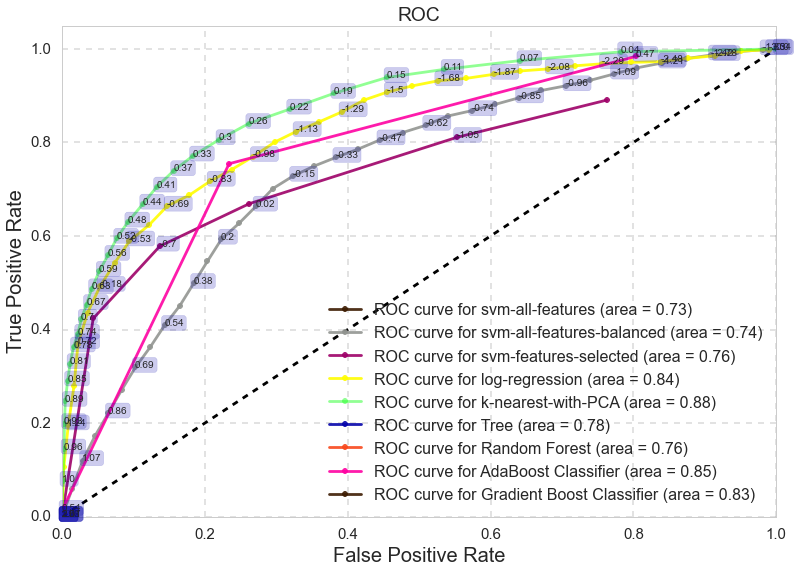

In [94]:
with sns.color_palette(colors):
    ax=make_roc("svm-all-features", classifierdict['clfsvm'][0],  classifierdict['clfsvm'][2],  classifierdict['clfsvm'][1], proba=False, labe=400, skip=200)
    make_roc("svm-all-features-balanced",classifierdict['clfsvm_b'][0], classifierdict['clfsvm_b'][2], classifierdict['clfsvm_b'][1], ax=ax, proba=False, labe=400, skip=200)
    make_roc("svm-features-selected",classifierdict['pipelinearsvm'][0], classifierdict['pipelinearsvm'][2], classifierdict['pipelinearsvm'][1], ax=ax, proba=False, labe=400, skip=200)
    make_roc("log-regression",classifierdict['clflog'][0], classifierdict['clflog'][2], classifierdict['clflog'][1], ax=ax, proba=False, labe=400, skip=200)
    make_roc("k-nearest-with-PCA", clfknn, dfpca_te["labor_force"],dfpca_te[VARTOUSEFEAT],ax=ax, labe=1, proba=True, skip=0)
    make_roc("Tree",classifierdict['clfTree2'][0], classifierdict['clfTree2'][2], classifierdict['clfTree2'][1], ax=ax, proba=True, labe=400, skip=200)
    make_roc("Random Forest",classifierdict['clfForest'][0], classifierdict['clfForest'][2], classifierdict['clfForest'][1], ax=ax, proba=True, labe=400, skip=200)
    make_roc("AdaBoost Classifier",classifierdict['clfAda'][0], classifierdict['clfAda'][2], classifierdict['clfAda'][1], ax=ax, proba=True, labe=400, skip=200)
    make_roc("Gradient Boost Classifier",classifierdict['clfGB'][0], classifierdict['clfGB'][2], classifierdict['clfGB'][1], ax=ax, proba=False, labe=400, skip=200)

##Comparing models using utility curves

Initially, define functions to calculate utility curves. This makes use of materials developed in Homework 3. A couple of small style features have been changed.


Based on our analysis, we found that the PCA classifier has the largest area under the curve and utility. The reduction of dimensions in PCA explains more than 99% of the variance in the explanatory variable, however, the dimensions cannot be mapped to our input variables, which makes it a difficult classifier to use in policy-making. While it can be used for predictive purposes, its interpretation is hard to explain to policy makers and it is very difficult to identify policy interventions based on the components identified in PCA.

Logarithmic classifier best predicts female labor force participation based on the accuracy, ROC curve, and average utility analysis besides the PCA model.  From Diagram 1, we can see that it captures an area of .84 and from Diagram 2, we find a positive utility – much larger than our baseline predictions.

In [95]:
def percentage(tpr, fpr, priorp, priorn):
    perc = tpr*priorp + fpr*priorn
    return perc

def av_profit(tpr, fpr, util, priorp, priorn):
    N=float(priorp+priorn)
    priorp = float(priorp)
    priorn = float(priorn)
    scaling = np.array([[(priorn/N), priorn/N],[priorp/N, priorp/N]])
    probs = np.array([[1-fpr, fpr],[1-tpr, tpr]])
    score=np.sum(u*scaling*probs)
    return score

def make_profit(name, clf, ytest, xtest, util, ax=None, threshold=False, labe=200, proba=True, ls="-"):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    priorp=np.mean(ytest)
    priorn=1. - priorp
    ben=[]
    percs=[]
    for i,t in enumerate(thresholds):
        perc=percentage(tpr[i], fpr[i], priorp, priorn)
        ev = av_profit(tpr[i], fpr[i], util, priorp, priorn)
        ben.append(ev)
        percs.append(perc*100)
    ax.plot(percs, ben, ls, alpha=0.8, markersize=5, label='utlity curve for %s' % name)
    if threshold:
        label_kwargs = {}
        label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
        )
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (percs[k], ben[k]), **label_kwargs)
    ax.legend(loc="lower right")
    ax.yaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1.5)
    ax.xaxis.grid(color='grey',alpha=0.3, linestyle='--', linewidth=1.5)
    return ax

Finally, we compare our models using utility curves:

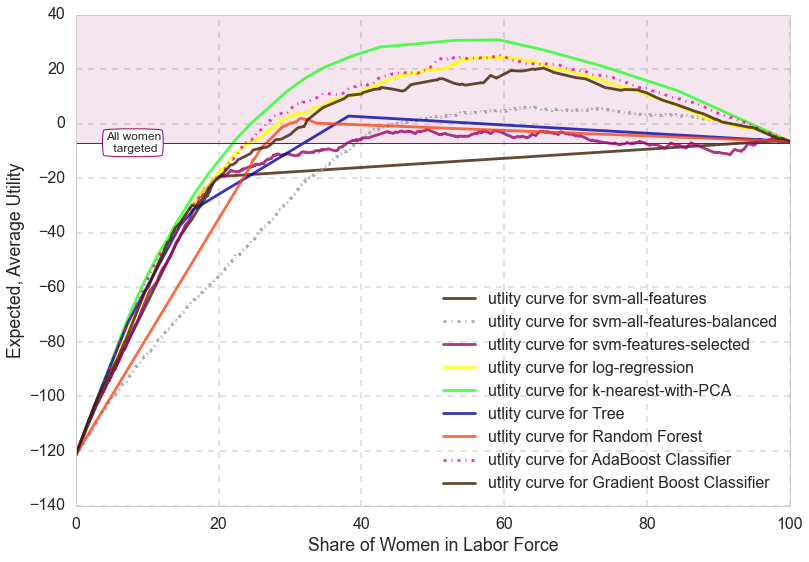

In [96]:
with sns.color_palette(newcolors):
    ax=make_profit("svm-all-features",classifierdict['clfsvm'][0], classifierdict['clfsvm'][2], classifierdict['clfsvm'][1], u, proba=False, labe=400)
    make_profit("svm-all-features-balanced",classifierdict['clfsvm_b'][0], classifierdict['clfsvm_b'][2], classifierdict['clfsvm_b'][1], u, ls="-.", ax=ax, proba=False, labe=400)
    make_profit("svm-features-selected",classifierdict['pipelinearsvm'][0], classifierdict['pipelinearsvm'][2], classifierdict['pipelinearsvm'][1], u, ax=ax, proba=False, labe=400)
    make_profit("log-regression",classifierdict['clflog'][0], classifierdict['clflog'][2], classifierdict['clflog'][1], u, ax=ax, proba=False, labe=400)
    make_profit("k-nearest-with-PCA", clfknn, dfpca_te["labor_force"], dfpca_te[VARTOUSEFEAT],u, ax=ax, labe=1, proba=True)
    make_profit("Tree",classifierdict['clfTree2'][0], classifierdict['clfTree2'][2], classifierdict['clfTree2'][1], u, ax=ax, proba=True, labe=400)
    make_profit("Random Forest",classifierdict['clfForest'][0], classifierdict['clfForest'][2], classifierdict['clfForest'][1], u, ax=ax, proba=True, labe=400)
    make_profit("AdaBoost Classifier",classifierdict['clfAda'][0], classifierdict['clfAda'][2], classifierdict['clfAda'][1], u, ls="-.", ax=ax, proba=True, labe=400)
    make_profit("Gradient Boost Classifier",classifierdict['clfGB'][0], classifierdict['clfGB'][2], classifierdict['clfGB'][1], u,  ax=ax, proba=False, labe=400)
    
    # Add baseline estimates
    ax.axhline(y=ALF_Avg, xmin=0, xmax=1, linewidth=1, color=newcolors[2])
    ax.axhspan(ALF_Avg,40, alpha=0.1, color=newcolors[2])

    bbox_props = dict(boxstyle="round4,pad=0.3", fc="white", ec=newcolors[2], lw=1)
    ax.text(8, ALF_Avg, "All women \n targeted", ha="center", va="center", rotation=0, size=12,bbox=bbox_props)

    ax.set_xlabel("Share of Women in Labor Force")
    ax.set_ylabel("Expected, Average Utility")

##Visualizing Classifiers Using Decision Surfaces
Using this function and the results from the "importance" analysis in our prediction section above, we subset the data matrix to include just the two features of highest importance. Then we plot the decision surfaces of a decision tree classifier, and a random forest classifier with number of trees set to 15, and a support vector machine with C set to 100, and gamma set to 1.0.

In [97]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]

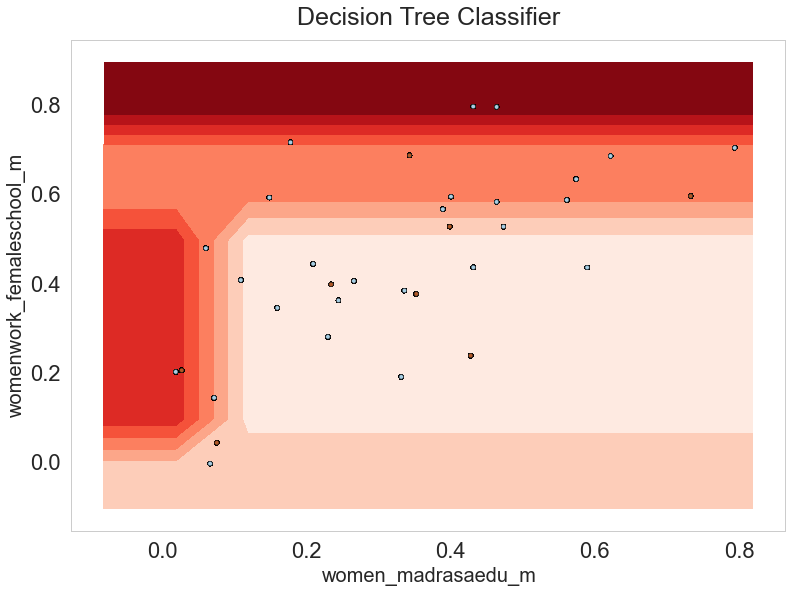

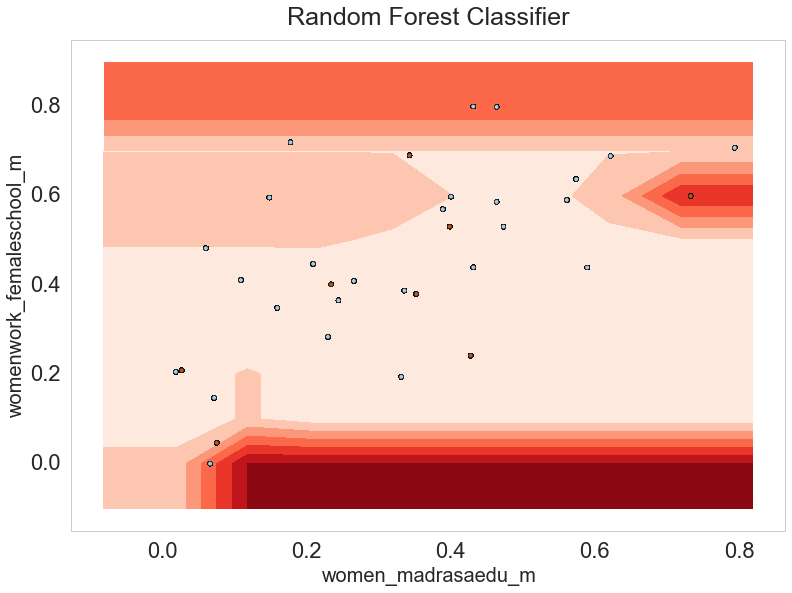

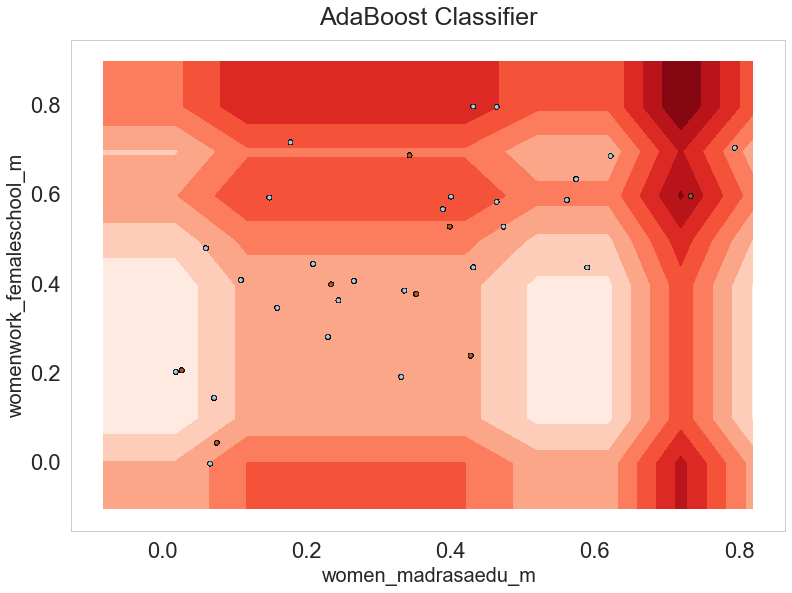

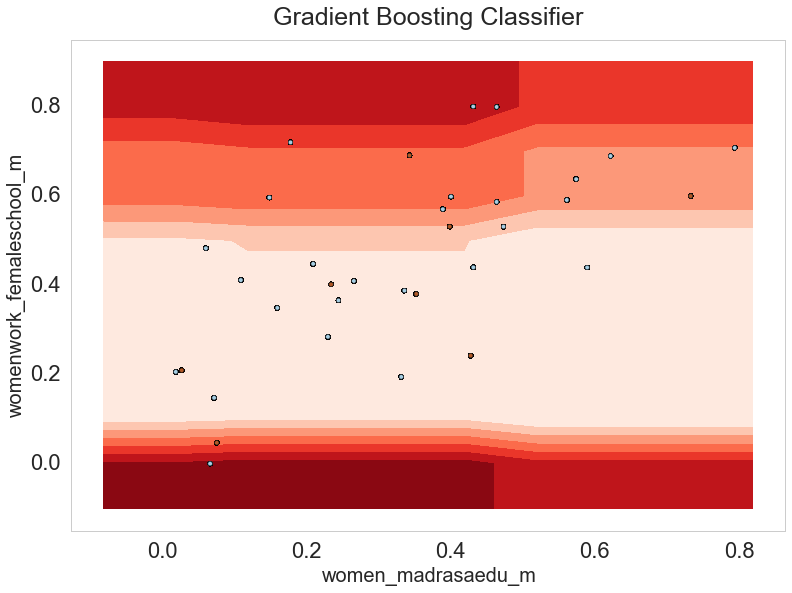

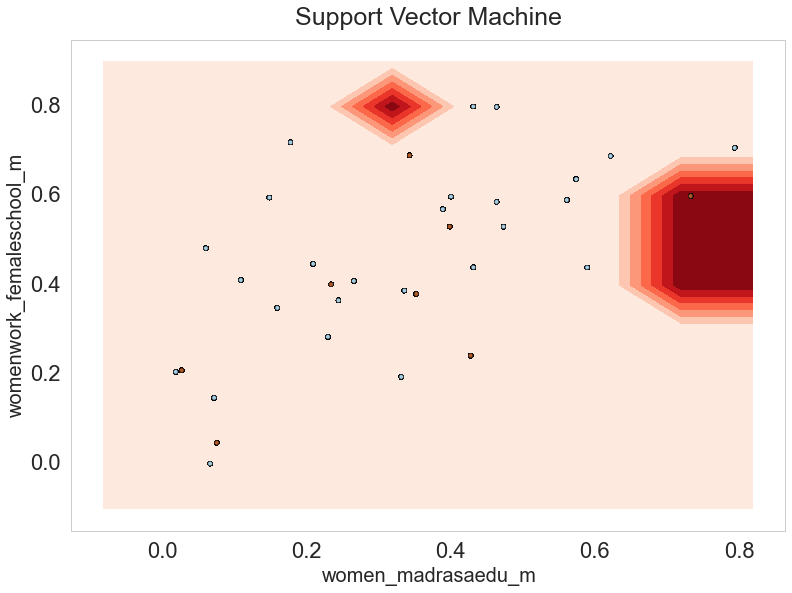

In [98]:
X_imp = df[imp_cols].values
Y = df.labor_force.values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=10.0, gamma=3.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in xrange(5):
    plt.title(titleClassifer[c],fontsize=25,y=1.02)
    plt.xlabel(name_list[0],fontsize=20)
    plt.ylabel(name_list[1],fontsize=20)
    plt.grid(False)
    plt.tick_params(axis='both',labelsize=22)
    plot_decision_surface(classifiers[c], X_imp, df.labor_force.values)

# Implications and Next Steps

**Implications**

Based on our findings, we have found a comprehensive list of variables/indicators that policy makers could potentially use to inform and design policy in a more technically sound manner.  These variables are highly correlated with female labor force participation, and if a program can be designed to tackle these items, then we may be more likely to influence women to join the labor force.

In addition, given the optimal policy program, we have found an optimal way to target women to enter into a program to maximize utility.  By this, we mean keeping program costs low while impacting the most number of women as feasible.  We aim to help development programs be both efficient and effective.

**Next Steps**

In order to use this model, the next step would be to help the Government of Afghanistan design a policy that uses the indicators mentioned as levers to affect women’s decision.  We plan to help the Government design a policy that is feasible, supportable, and also technically correct and rigorously modeled.  We hope that our skills from CS109 can help solve some of the world’s more challenging and complex problems.

# Website creation process

 ![Web1](image/Web1.png) 
 ![Web2](image/Web2.png) 
 ![Web3](image/Web3.png)